# **Trabalho prático de Mineração de Dados e Aprendizado de Máquina**
### **Auditorias em Planos de Saúde**

Autorização de procedimentos de uma operadora de Planos de Saúde

</br>

---
**Instituto de Informática - UFG**

Disciplina: Mineração de Dados e Aprendizado de Máquina

Prof. Rogério Salvini

---

Discentes:
 
* André Ribeiro Miranda - 201904191
* Jefferson Carvalho Silva
* Wendel Marques de Jesus Souza - 201702793

---

Links úteis:
* [Descrição do Trabalho](#)
* [Dicionário de Dados](#)
* [Competição no Kaggle](#)
* [Base de Dados](#)
* [Pasta no Google Drive](#)


# Objetivos gerais deste artefato

1. Obtenção de *insights* sobre o conjunto de dados.  Para tanto, serão utilizadas técnicas de visualização de dados e alguns cálculos estátisticos básicos. Essa etapa é chamada de análise exploratória de dados (AED). Por meio dela, é possível também encontrar problemas, padrões e relacionamentos que poderão apoiar a etapa de pré-processamento, que antecede a implementação. 

2. Documentação de todo o processo de geração e avaliação de um modelo, bem como a geração do artefato que será submetido no Kaggle.

#Especificação do problema 

## Problema 
Os auditores são profissionais especializados (médicos e enfermeiros) que geram custos elevados para a operadora. Quanto maior o número de requisições encaminhadas para auditoria, maior será o gasto administrativo. Os sistemas atuais se limitam a analisar as regras parametrizadas (se/então), não conseguem analisar o comportamento dos auditores para prever desfechos prováveis. 

## Proposta 
Gerar modelos capazes de combinar as variáveis de uma requisição e, baseada no comportamento histórico dos auditores, consiga automatizar a análise de novas solicitações.

# Aquisição de bibliotecas e dados

###Bibliotecas utilizadas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#biblitoecas utilizadas na etada AED
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') #evita que warnings sejam mostrados

# ###
# from sklearn.preprocessing import LabelEncoder
# from scipy import stats

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# from sklearn import svm
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# import graphviz 

# from sklearn.metrics import classification_report
# from imblearn.under_sampling import RandomUnderSampler

### Aquisição dos dados

Base de dados disponível [aqui](#).

In [ ]:
#Leitura dos dados
df = pd.read_csv('#', sep=';')

#Exemplo de algumas linhas do conjunto de dados 
df.head(5)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1506266,4178993,2459565,Guia de solicitac?o SP/SADT,2437002.0,1,CLINICA,Medico oncologista clinico,NaN,NaN,...,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,Autorizado
1,1586873,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,2428370.0,1,HOSPITAL,Medico em medicina intensiva,NaN,NaN,...,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,Autorizado
2,1556472,4335516,2459597,Guia de solicitac?o SP/SADT,2437266.0,1,CLINICA DE IMAGEM,Medico ginecologista e obstetra,NaN,NaN,...,NaN,PEDIDO MEDICO EM ANEXO,Procedimentos,40901300,"USG - ULTRASSONOGRAFIA - TRANSVAGINAL (UTERO, ...",ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1,Autorizado
3,943431,2331936,2459271,Guia de solicitac?o SP/SADT,2441608.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,H353,\nLAUDO OFTALMOLOGICO \n\n \nPaciente: Patrici...,Procedimentos,30307147,PCT-HM - TRATAMENTO OCULAR QUIMIOTERAPICO COM ...,CORPO VITREO,OLHOS,PROCED. CIRURGICOS E INVASIVOS,1,Negado
4,1107870,2865226,2459361,Guia de solicitac?o SP/SADT,2435597.0,1,PRESTADOR DE SERVICOS,Medico clinico,NaN,NaN,...,NaN,dor cronica.,Procedimentos,41101227,RM - RESSONANCIA MAGNETICA - COLUNA CERVICAL O...,RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2,Autorizado


# Análise Exploratória dos Dados

Descrição e análise estatísticas dos dados (sumários, visualizações…).
Discussão sobre as tarefas de limpeza do dados (dados irrelevantes,
faltantes, duplicados, inconsistentes, outliers…).

## Informações básicas sobre o DataFrame
Dimensionalidade e descrição estatística

In [ ]:
#exibe todos os aributos
pd.set_option('display.max_columns', None)
df.head(2)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1506266,4178993,2459565,Guia de solicitac?o SP/SADT,2437002.0,1,CLINICA,Medico oncologista clinico,NaN,NaN,NaN,NaN,N?o acidente,NaN,NaN,NaN,Eletiva,NaN,NaN,NaN,Quimioterapia,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,Autorizado
1,1586873,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,2428370.0,1,HOSPITAL,Medico em medicina intensiva,NaN,NaN,NaN,NaN,N?o acidente,NaN,Clinica,Hospitalar,Urgencia/Emergencia,UTI Adulto,2.0,1573390.0,NaN,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,Autorizado


In [ ]:
#Verificação da dimensionalidade do DataFrame
df.shape

(412540, 31)

In [ ]:
#Informações dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412540 entries, 0 to 412539
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          412540 non-null  int64  
 1   NR_SEQ_ITEM                412540 non-null  int64  
 2   DT_REQUISICAO              412540 non-null  int64  
 3   DS_TIPO_GUIA               412540 non-null  object 
 4   DT_NASCIMENTO              412529 non-null  float64
 5   NR_PRODUTO                 412540 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  412540 non-null  object 
 7   DS_CBO                     412540 non-null  object 
 8   DS_TIPO_CONSULTA           15689 non-null   object 
 9   QT_TEMPO_DOENCA            281 non-null     float64
 10  DS_UNIDADE_TEMPO_DOENCA    282 non-null     object 
 11  DS_TIPO_DOENCA             967 non-null     object 
 12  DS_INDICACAO_ACIDENTE      380490 non-null  object 
 13  DS_TIPO_SAIDA              0 

In [ ]:
variaveis_categoricas = df.select_dtypes(include=object).columns
variaveis_numericas = df.select_dtypes(include=np.number).columns

variaveis_categoricas, variaveis_numericas


(Index(['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO',
        'DS_TIPO_CONSULTA', 'DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_DOENCA',
        'DS_INDICACAO_ACIDENTE', 'DS_TIPO_INTERNACAO', 'DS_REGIME_INTERNACAO',
        'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'DS_TIPO_ATENDIMENTO',
        'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_ITEM',
        'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO', 'DS_STATUS_ITEM'],
       dtype='object'),
 Index(['NR_SEQ_REQUISICAO', 'NR_SEQ_ITEM', 'DT_REQUISICAO', 'DT_NASCIMENTO',
        'NR_PRODUTO', 'QT_TEMPO_DOENCA', 'DS_TIPO_SAIDA', 'QT_DIA_SOLICITADO',
        'CD_GUIA_REFERENCIA', 'CD_ITEM', 'QT_SOLICITADA'],
       dtype='object'))

In [ ]:
#Descrição estatística de cada recurso
df[variaveis_numericas].describe()

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DT_NASCIMENTO,NR_PRODUTO,QT_TEMPO_DOENCA,DS_TIPO_SAIDA,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,CD_ITEM,QT_SOLICITADA
count,4.125400e+05,4.125400e+05,4.125400e+05,4.125290e+05,412540.0,281.000000,0.0,120685.000000,7.029800e+04,4.125400e+05,412540.000000
mean,1.151521e+06,2.626495e+06,2.459381e+06,2.439534e+06,1.0,8.960854,NaN,2.460372,1.179341e+06,5.946714e+07,59.127765
std,2.889745e+05,1.179561e+06,1.533197e+02,6.849753e+03,0.0,11.014045,NaN,3.703165,2.497937e+05,2.185481e+08,4056.078153
min,5.796250e+05,8.231270e+05,2.459075e+06,2.421816e+06,1.0,1.000000,NaN,0.000000,5.797030e+05,4.200000e+01,1.000000
25%,9.300360e+05,1.468307e+06,2.459264e+06,2.434627e+06,1.0,3.000000,NaN,1.000000,9.922550e+05,2.020305e+07,1.000000
50%,1.189158e+06,2.760746e+06,2.459402e+06,2.438884e+06,1.0,5.000000,NaN,1.000000,1.186608e+06,4.070601e+07,1.000000
75%,1.385720e+06,3.658920e+06,2.459506e+06,2.443453e+06,1.0,11.000000,NaN,3.000000,1.395000e+06,4.140148e+07,2.000000
max,1.614682e+06,4.525999e+06,2.459622e+06,2.459562e+06,1.0,92.000000,NaN,55.000000,1.613675e+06,3.000079e+09,600343.000000


## Dados incompletos
Identificação de valores missing

In [ ]:
df.shape

(412540, 31)

In [ ]:
#Verificação de valores missing
for coluna in df.columns:
    print("Qtd. de valores faltantes em {}: {}".format(coluna, df[coluna].isna().sum()))

In [ ]:
#Verificação de valores missing  
print('############################################################\n PORCENTAGEM DE DADOS FALTANTES\n############################################################\n')
for coluna in df.columns:
  qtd_dados_faltantes = df[coluna].isna().sum()                                                             
  porcentagem = qtd_dados_faltantes*100/len(df)
  print("{}: {}".format(coluna, round(porcentagem, 2)))
 

############################################################
 PORCENTAGEM DE DADOS FALTANTES
############################################################

NR_SEQ_REQUISICAO: 0.0
NR_SEQ_ITEM: 0.0
DT_REQUISICAO: 0.0
DS_TIPO_GUIA: 0.0
DT_NASCIMENTO: 0.0
NR_PRODUTO: 0.0
DS_TIPO_PREST_SOLICITANTE: 0.0
DS_CBO: 0.0
DS_TIPO_CONSULTA: 96.2
QT_TEMPO_DOENCA: 99.93
DS_UNIDADE_TEMPO_DOENCA: 99.93
DS_TIPO_DOENCA: 99.77
DS_INDICACAO_ACIDENTE: 7.77
DS_TIPO_SAIDA: 100.0
DS_TIPO_INTERNACAO: 70.44
DS_REGIME_INTERNACAO: 70.44
DS_CARATER_ATENDIMENTO: 0.0
DS_TIPO_ACOMODACAO: 70.46
QT_DIA_SOLICITADO: 70.75
CD_GUIA_REFERENCIA: 82.96
DS_TIPO_ATENDIMENTO: 29.4
CD_CID: 56.97
DS_INDICACAO_CLINICA: 21.2
DS_TIPO_ITEM: 0.0
CD_ITEM: 0.0
DS_ITEM: 0.0
DS_CLASSE: 0.0
DS_SUBGRUPO: 0.0
DS_GRUPO: 0.0
QT_SOLICITADA: 0.0
DS_STATUS_ITEM: 0.0


In [ ]:
#Verificação de valores missing  
print('#### ATRIBUTOS QUE POSSUEM MAIS DA METADE DE DADOS FALTANTES\n')
for coluna in df.columns:
  qtd_dados_faltantes = df[coluna].isna().sum()                                                             
  if qtd_dados_faltantes > len(df)/2:
    print("Qtd. de valores faltantes em {}: {}".format(coluna, qtd_dados_faltantes))
 

#### ATRIBUTOS QUE POSSUEM MAIS DA METADE DE DADOS FALTANTES

Qtd. de valores faltantes em DS_TIPO_CONSULTA: 396851
Qtd. de valores faltantes em QT_TEMPO_DOENCA: 412259
Qtd. de valores faltantes em DS_UNIDADE_TEMPO_DOENCA: 412258
Qtd. de valores faltantes em DS_TIPO_DOENCA: 411573
Qtd. de valores faltantes em DS_TIPO_SAIDA: 412540
Qtd. de valores faltantes em DS_TIPO_INTERNACAO: 290612
Qtd. de valores faltantes em DS_REGIME_INTERNACAO: 290611
Qtd. de valores faltantes em DS_TIPO_ACOMODACAO: 290686
Qtd. de valores faltantes em QT_DIA_SOLICITADO: 291855
Qtd. de valores faltantes em CD_GUIA_REFERENCIA: 342242
Qtd. de valores faltantes em CD_CID: 235017


In [ ]:
#Verificação de valores missing  
print('#### ATRIBUTOS QUE POSSUEM MAIS DE 70% DE DADOS FALTANTES\n')
for coluna in df.columns:
  qtd_dados_faltantes = df[coluna].isna().sum()                                                             
  if qtd_dados_faltantes > len(df)*0.7:
    print("Qtd. de valores faltantes em {}: {}".format(coluna, qtd_dados_faltantes))
 

#### ATRIBUTOS QUE POSSUEM MAIS DE 70% DE DADOS FALTANTES

Qtd. de valores faltantes em DS_TIPO_CONSULTA: 396851
Qtd. de valores faltantes em QT_TEMPO_DOENCA: 412259
Qtd. de valores faltantes em DS_UNIDADE_TEMPO_DOENCA: 412258
Qtd. de valores faltantes em DS_TIPO_DOENCA: 411573
Qtd. de valores faltantes em DS_TIPO_SAIDA: 412540
Qtd. de valores faltantes em DS_TIPO_INTERNACAO: 290612
Qtd. de valores faltantes em DS_REGIME_INTERNACAO: 290611
Qtd. de valores faltantes em DS_TIPO_ACOMODACAO: 290686
Qtd. de valores faltantes em QT_DIA_SOLICITADO: 291855
Qtd. de valores faltantes em CD_GUIA_REFERENCIA: 342242


In [ ]:
#Verificação de valores missing  
print('#### ATRIBUTOS QUE POSSUEM MAIS DE 95% DE DADOS FALTANTES\n')
for coluna in df.columns:
  qtd_dados_faltantes = df[coluna].isna().sum()                                                             
  if qtd_dados_faltantes > (len(df)*0.95):
    print("Qtd. de valores faltantes em {}: {}".format(coluna, qtd_dados_faltantes))

#### ATRIBUTOS QUE POSSUEM MAIS DE 90% DE DADOS FALTANTES

Qtd. de valores faltantes em DS_TIPO_CONSULTA: 396851
Qtd. de valores faltantes em QT_TEMPO_DOENCA: 412259
Qtd. de valores faltantes em DS_UNIDADE_TEMPO_DOENCA: 412258
Qtd. de valores faltantes em DS_TIPO_DOENCA: 411573
Qtd. de valores faltantes em DS_TIPO_SAIDA: 412540


In [ ]:
#Verificação de valores missing  
print('#### ATRIBUTOS QUE POSSUEM TODOS OS DADOS FALTANTES\n')
for coluna in df.columns:
  qtd_dados_faltantes = df[coluna].isna().sum()                                                             
  if qtd_dados_faltantes == len(df):
    print("Qtd. de valores faltantes em {}: {}".format(coluna, qtd_dados_faltantes))

#### ATRIBUTOS QUE POSSUEM TODOS OS DADOS FALTANTES

Qtd. de valores faltantes em DS_TIPO_SAIDA: 412540


##Dados redundantes
Identificação de dados duplicados

In [ ]:
#Verifica se tem duplicates
df[df.duplicated()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM


##Dados inconsistentes
Busca prelimir de dados inconsistentes

In [ ]:
atributos_entrada = df.columns
atributos_entrada = atributos_entrada.drop(labels=['DS_STATUS_ITEM'])

df[df.duplicated(subset=atributos_entrada, keep=False)]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM


##**Resultados preliminares**

* Não há objetos duplicados;
* Aparentemente, não inconsistência entre atributos de entrada e saída;
* Das 31 tabelas:
 * 11 possuem uma quantidade de dados faltantes superior a metade da quantidade de exemplos;
 * 6 possuem uma quantidade de dados faltantes superior a 80% da quantidade de exemplos;
  * 6 possuem uma quantidade de dados faltantes superior a 95% da quantidade de exemplos;
  * 1 tabela possui todos os dados faltantes.


## Análise aprofundada dos atributos
Verificação de inconsistências, redundâncias, outliers e desbalanceamento.

### Atributos númericos

#### Visualização gráfica geral de todos os dados

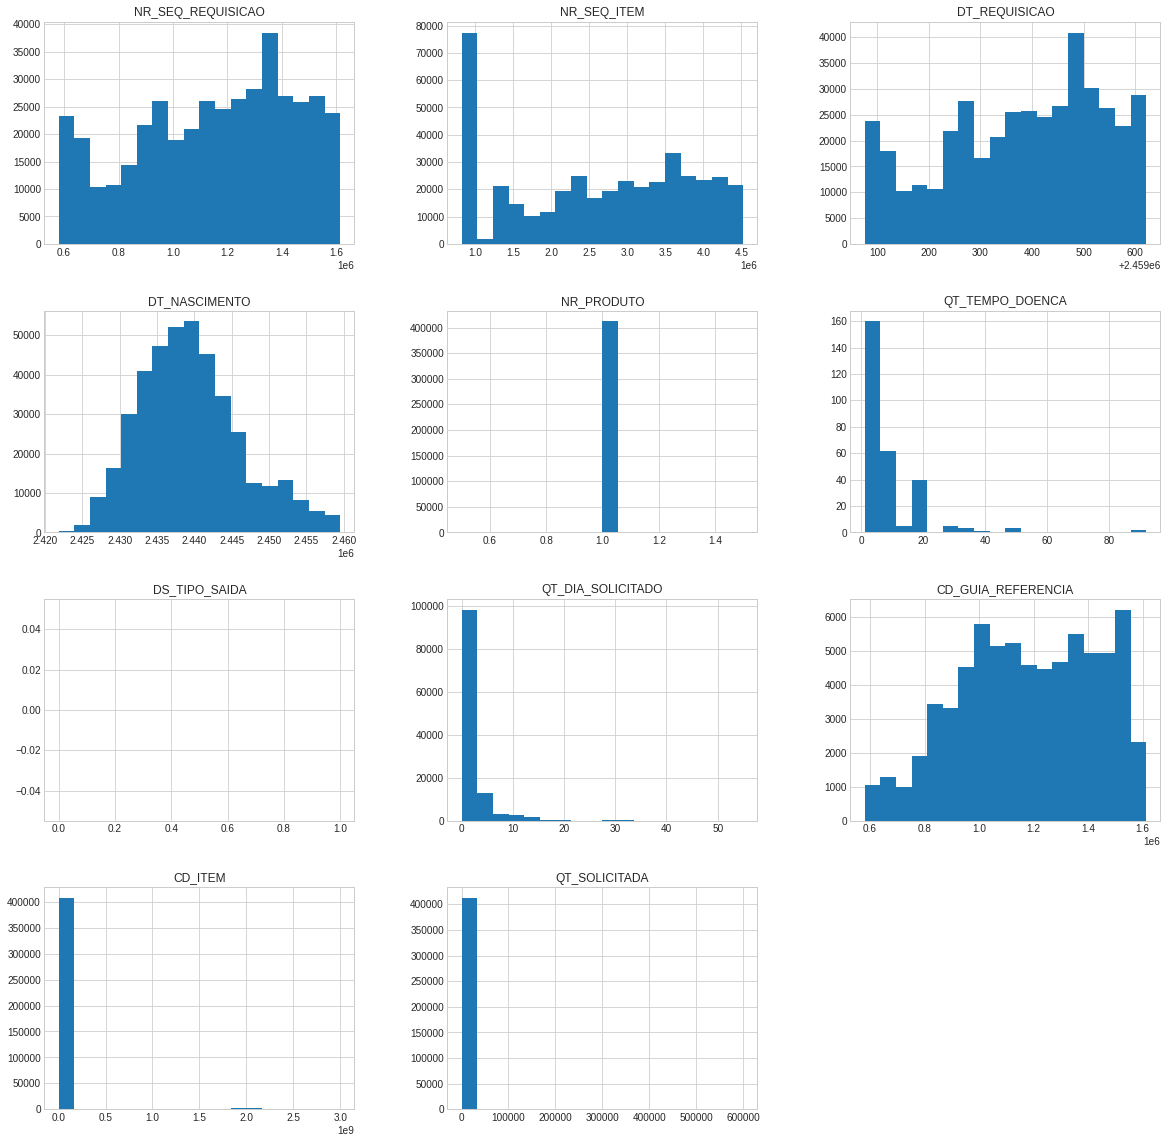

In [ ]:
# Análise visual geral de todos os dados
plt.style.use('seaborn-whitegrid')
df.hist(bins=18,figsize=(20,20))
plt.show()

In [ ]:
#Verificação dos valores da coluna NR_PRODUTO
pd.unique((df['NR_PRODUTO']))

array([1])

In [ ]:
#Verificação dos valores da coluna QT_DIA_SOLICITACAO

len(pd.unique((df['QT_DIA_SOLICITADO'])))

37

In [ ]:
# variaveis_numericas_aux = list(variaveis_numericas)
# variaveis_numericas_aux.append('DS_STATUS_ITEM')
# variaveis_numericas_aux

# sns.pairplot(df[variaveis_numericas_aux], hue='DS_STATUS_ITEM');
# plt.show()

####**Resultados preliminares**

Dessa forma, temos que:
* Verificar o significado de NR_SEQ_REQUISICAO e NR_SEQ_ITEM;
* DT_REQUISICAO e DT_NASCIMENTO fora do formato DD/MM/AAAA;
  * Verificar se, durante a avaliação do modelo, serão apresentados dados fora desse padrão de datas. Se sim, analisar possível necessidade de normalização.
* NR_PRODUTO possui apenas um valor em todos os objetos;
* Como visto em etapas anteriores:
  * QT_TEMPO_DOENCA possui 95% de dados ausentes;
  * QT_DIA_SOLICITADO possui mais da metade de dados ausentes;
  * CD_GUIA_REFERENCIA possui 80%+ de dados ausentes, além disso, não há informações sobre os dados desse atributo no dicionário de dados;

**Nesse sentido, conclui-se previamente que:**
1. é necessário verificar, a partir da associação entre QT_TEMPO_DOENCA e CD_CID, se é possível e viavél a substituição dos dados ausentes de QT_TEMPO_DOENCA;
2. os atributos NR_PRODUTO, CD_GUIA_REFERENCIA possivelmente podem ser descartados pelos motivos listados anteriormente;
3. é necessário verificar o significado de NR_SEQ_REQUISICAO, NR_SEQ_ITEM (manter); e,
5. é necessário analisar a corelação entre CD_ITEM, QT_SOLICITADA e DS_STATUS_ITEM para verificação de descarte.

**Portanto, nas analises posteriores dessa subseção, NR_PRODUTO e CD_GUIA_REFERENCIA não serão averiguados com outras técnicas.**


In [ ]:
pd.set_option('display.max_columns', None)
df.head(2)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1506266,4178993,2459565,Guia de solicitac?o SP/SADT,2437002.0,1,CLINICA,Medico oncologista clinico,NaN,NaN,NaN,NaN,N?o acidente,NaN,NaN,NaN,Eletiva,NaN,NaN,NaN,Quimioterapia,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,Autorizado
1,1586873,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,2428370.0,1,HOSPITAL,Medico em medicina intensiva,NaN,NaN,NaN,NaN,N?o acidente,NaN,Clinica,Hospitalar,Urgencia/Emergencia,UTI Adulto,2.0,1573390.0,NaN,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,Autorizado


#### Cruzamento entre status e tempo de doença

NECESSARIO DEFINIR UMA ESCALA - DS_UNIDADE_TEMPO_DOENCA

In [ ]:
classe = df['DS_STATUS_ITEM']
atributo = df['QT_TEMPO_DOENCA']
crosstb = pd.crosstab(columns=classe, index=atributo)
crosstb

DS_STATUS_ITEM,Autorizado,Negado,Parcialmente autorizado
QT_TEMPO_DOENCA,,,
1.0,38,1,0
2.0,20,10,0
3.0,30,17,1
4.0,4,2,0
5.0,29,0,0
6.0,2,6,0
7.0,8,1,0
8.0,4,4,0
9.0,2,0,0


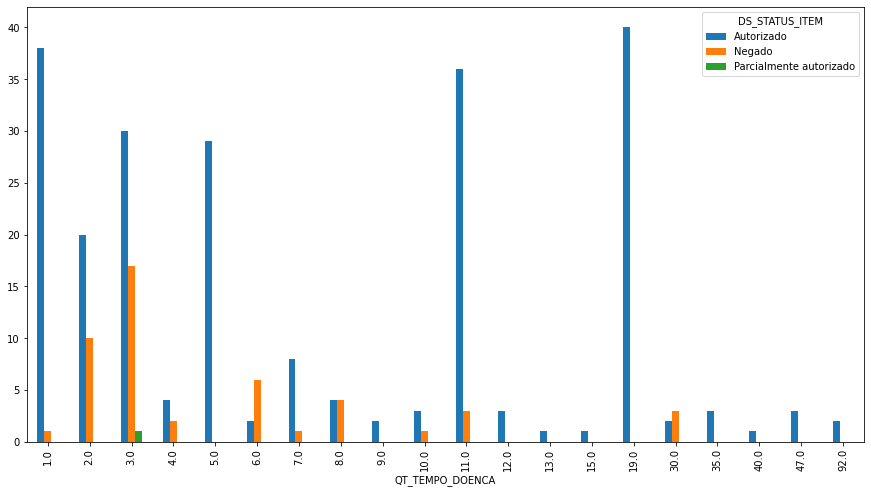

In [ ]:
pd.crosstab(df['QT_TEMPO_DOENCA'], df['DS_STATUS_ITEM']).plot(kind='bar', figsize=(15,8))

#### Cruzamento entre status e DT_REQUISICAO

In [ ]:
classe = df['DS_STATUS_ITEM']
atributo = df['DT_REQUISICAO']
crosstb = pd.crosstab(columns=classe, index=atributo)
crosstb

DS_STATUS_ITEM,Autorizado,Negado,Parcialmente autorizado
DT_REQUISICAO,,,
2459075,237,27,13
2459076,734,97,6
2459077,304,108,5
2459078,15,33,0
2459079,632,180,27
...,...,...,...
2459618,980,216,24
2459619,1002,286,13
2459620,878,262,32


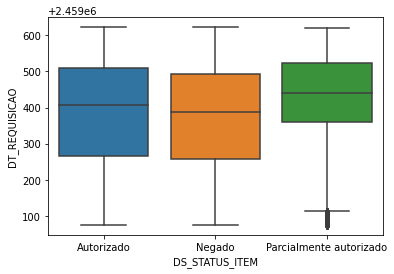

In [ ]:
sns.boxplot(x=df['DS_STATUS_ITEM'], y=df['DT_REQUISICAO'], data=df, whis=1.5)
plt.show()

### Atributos simbolicos/ textuais

In [ ]:
pd.set_option('display.max_columns', None)
df.head(2)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,DS_TIPO_INTERNACAO,DS_REGIME_INTERNACAO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,DS_TIPO_ATENDIMENTO,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1506266,4178993,2459565,Guia de solicitac?o SP/SADT,2437002.0,1,CLINICA,Medico oncologista clinico,NaN,NaN,NaN,NaN,N?o acidente,NaN,NaN,NaN,Eletiva,NaN,NaN,NaN,Quimioterapia,C90,Mieloma mult e neopl malig de plasmocitos,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1,Autorizado
1,1586873,4433946,2459611,Guia de solicitac?o de prorrogac?o de internac?o,2428370.0,1,HOSPITAL,Medico em medicina intensiva,NaN,NaN,NaN,NaN,N?o acidente,NaN,Clinica,Hospitalar,Urgencia/Emergencia,UTI Adulto,2.0,1573390.0,NaN,NaN,"Solicitac?o de prorrogac?o de 2 diarias, refer...",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,6,Autorizado


#### DS_TIPO_GUIA

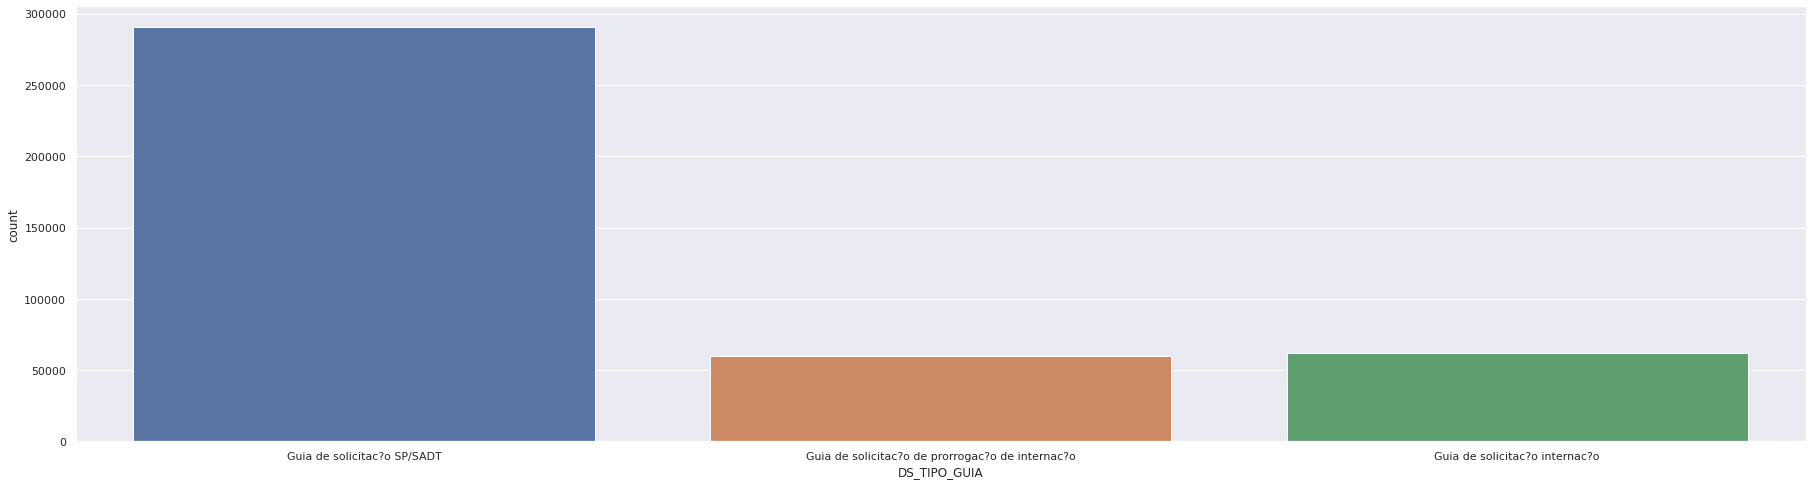

In [ ]:
# df.DS_TIPO_GUIA.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_GUIA)

#### DS_TIPO_PREST_SOLICITANTE

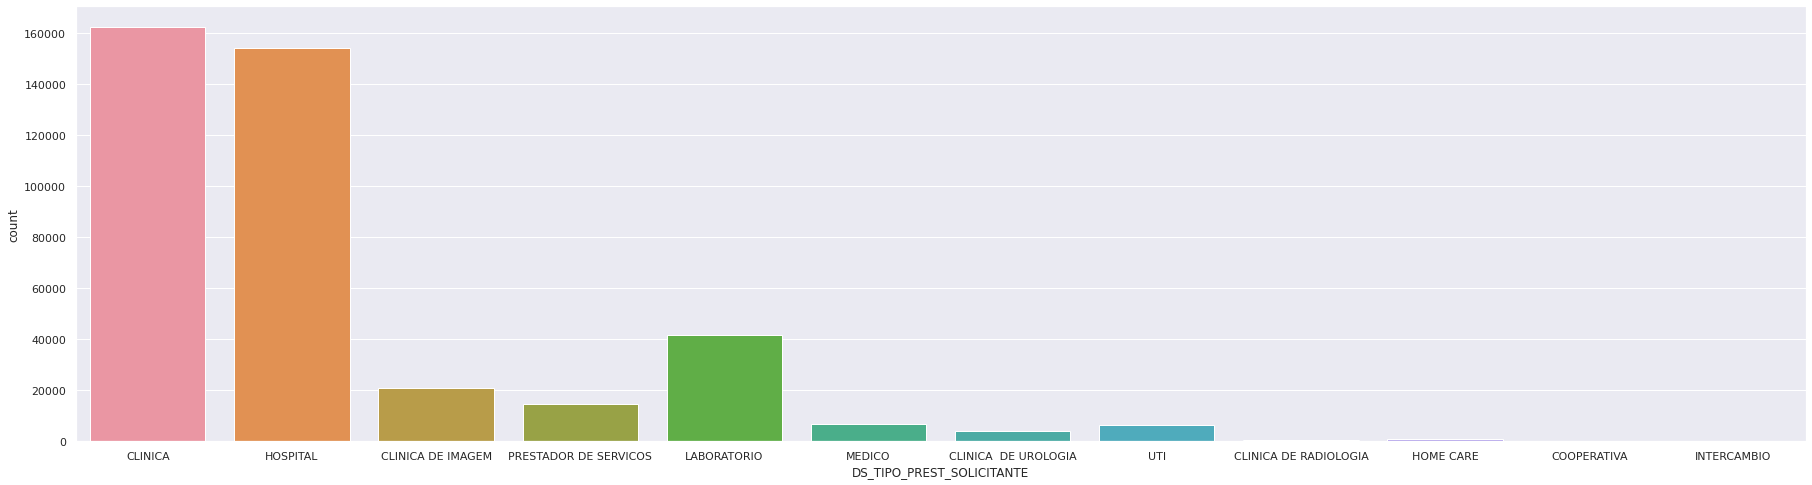

In [ ]:
df.DS_TIPO_PREST_SOLICITANTE.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_PREST_SOLICITANTE)

#### DS_CBO

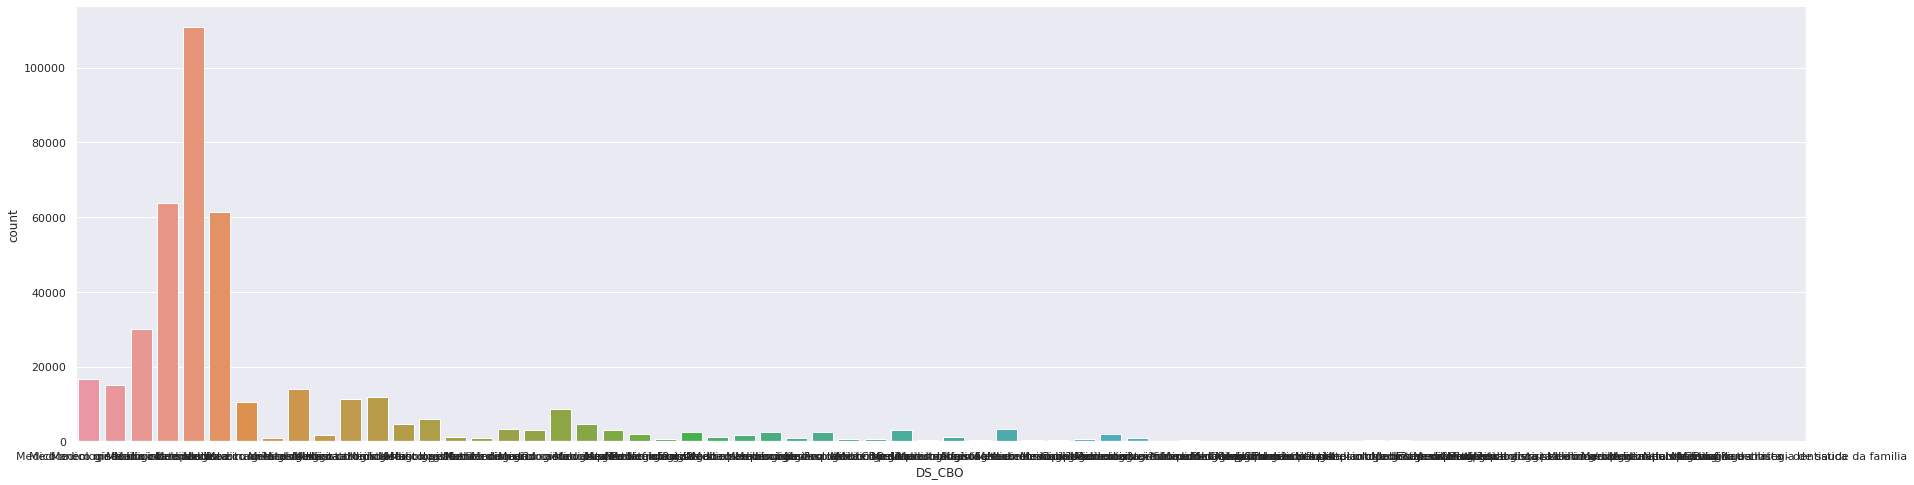

In [ ]:
df.DS_CBO.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_CBO)

#### DS_TIPO_CONSULTA

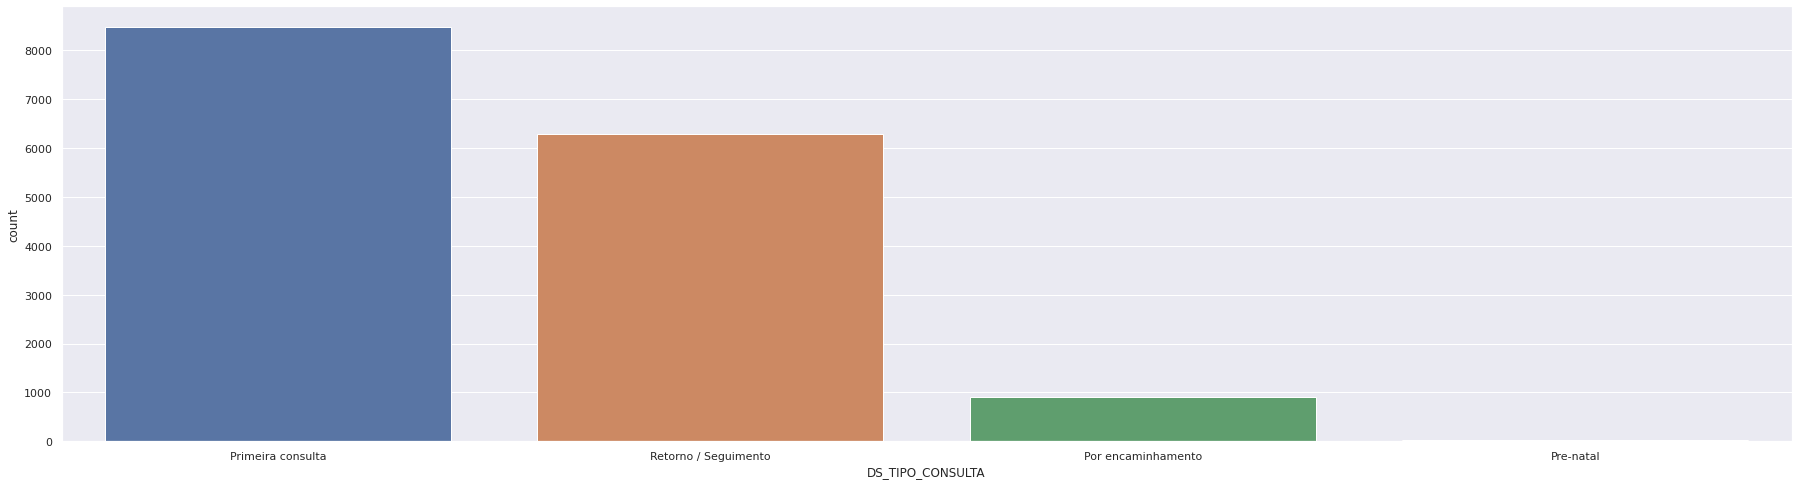

In [ ]:
# df.DS_TIPO_PREST_SOLICITANTE.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_CONSULTA)

#### DS_UNIDADE_TEMPO_DOENCA

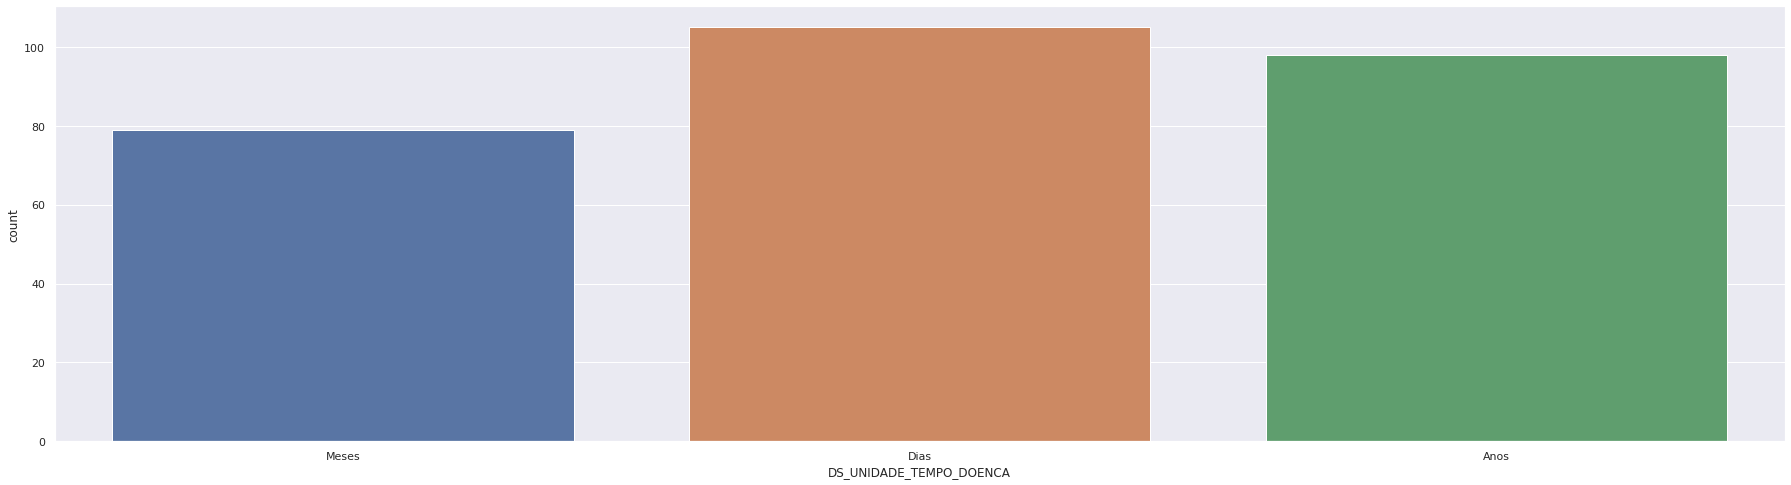

In [ ]:
# df.DS_TIPO_PREST_SOLICITANTE.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_UNIDADE_TEMPO_DOENCA)

#### DS_TIPO_DOENCA

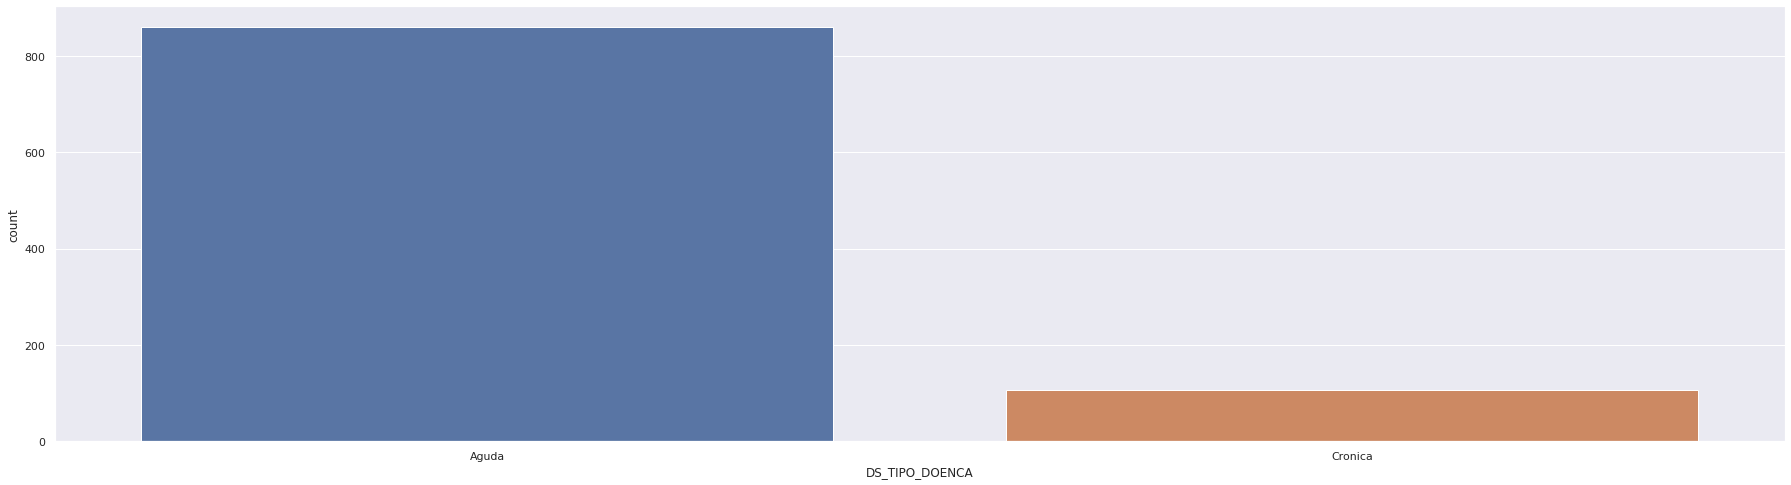

In [ ]:
# df.DS_TIPO_DOENCA.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_DOENCA)

#### DS_INDICACAO_ACIDENTE

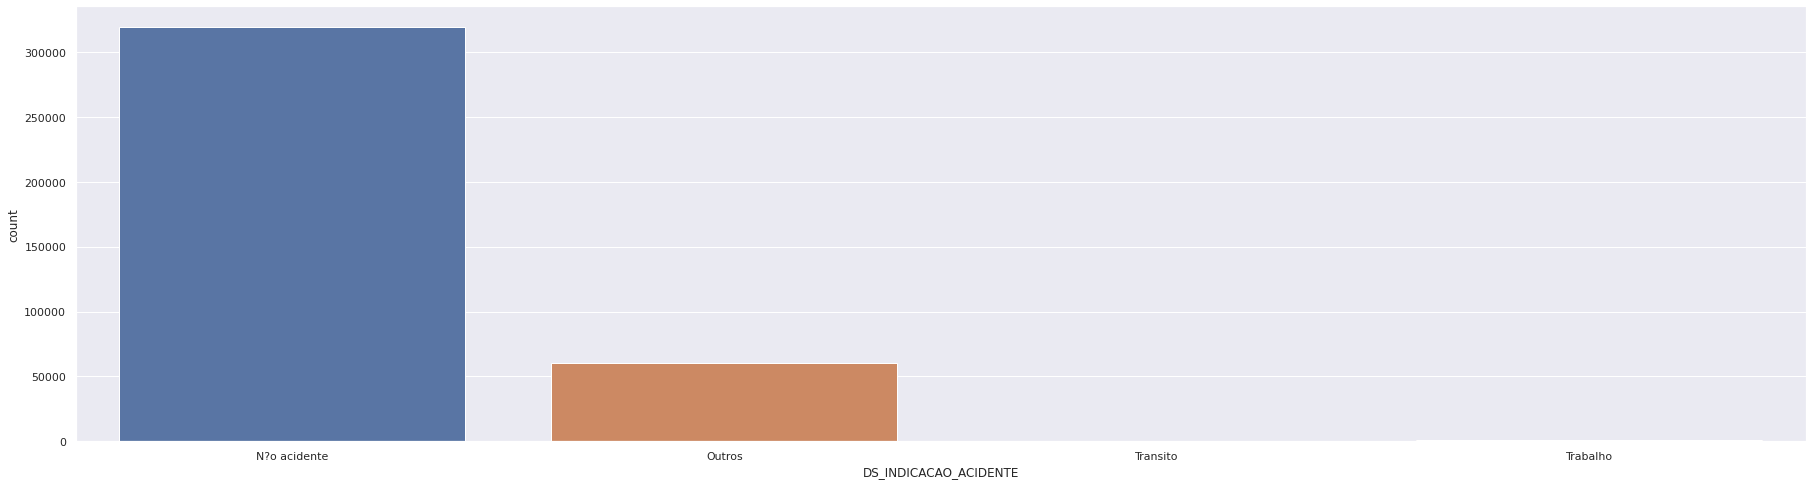

In [ ]:
# df.DS_INDICACAO_ACIDENTE.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_INDICACAO_ACIDENTE)

#### DS_TIPO_INTERNACAO 

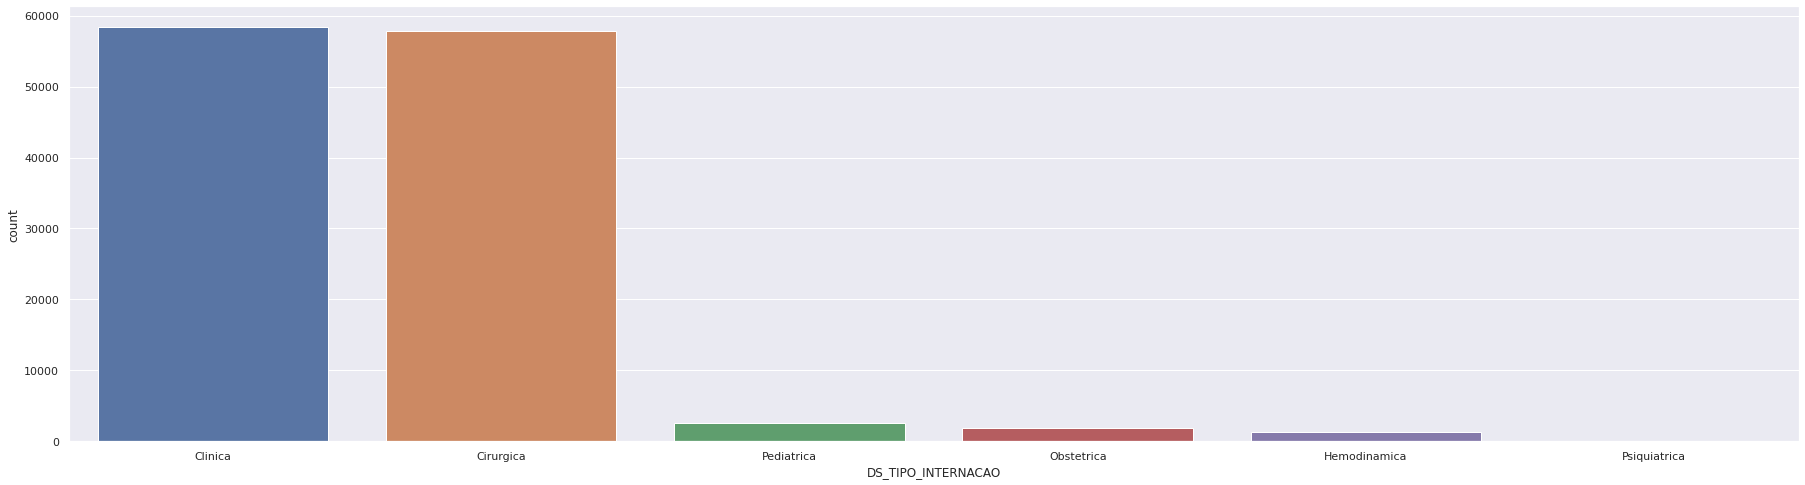

In [ ]:
# df.'DS_TIPO_INTERNACAO', .value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_INTERNACAO)

#### DS_REGIME_INTERNACAO

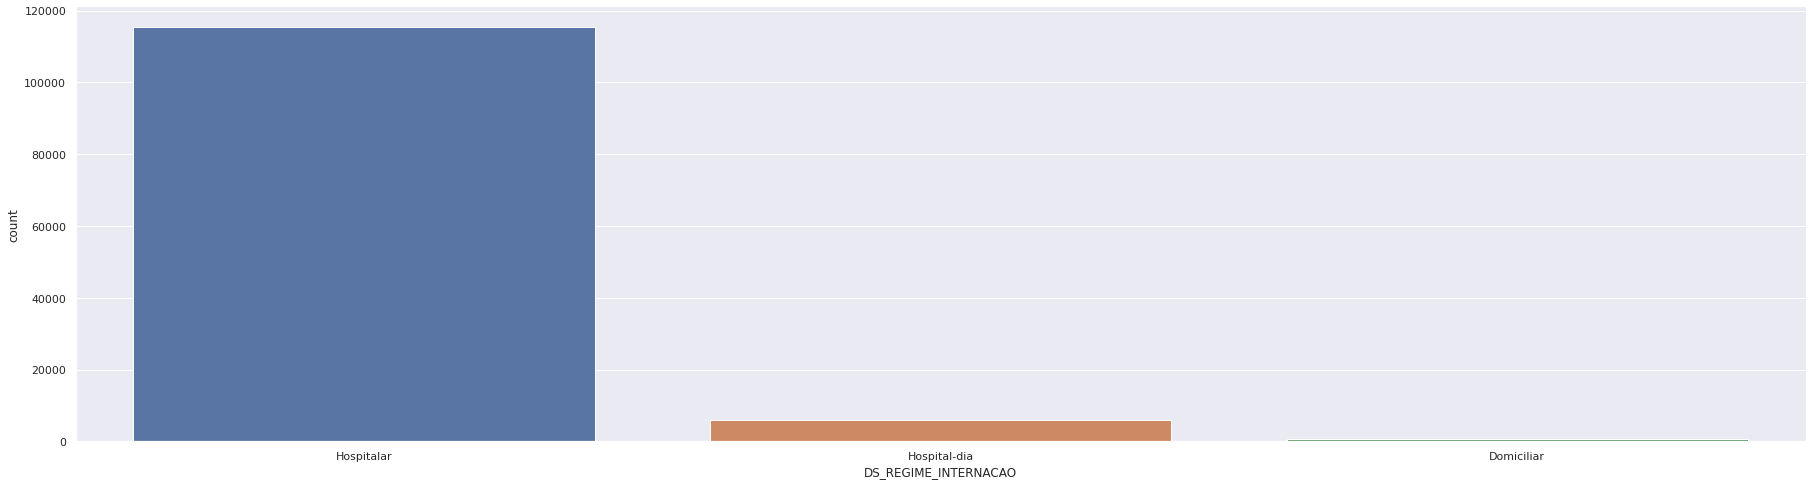

In [ ]:
# df.'DS_REGIME_INTERNACAO', .value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_REGIME_INTERNACAO)

#### DS_CARATER_ATENDIMENTO

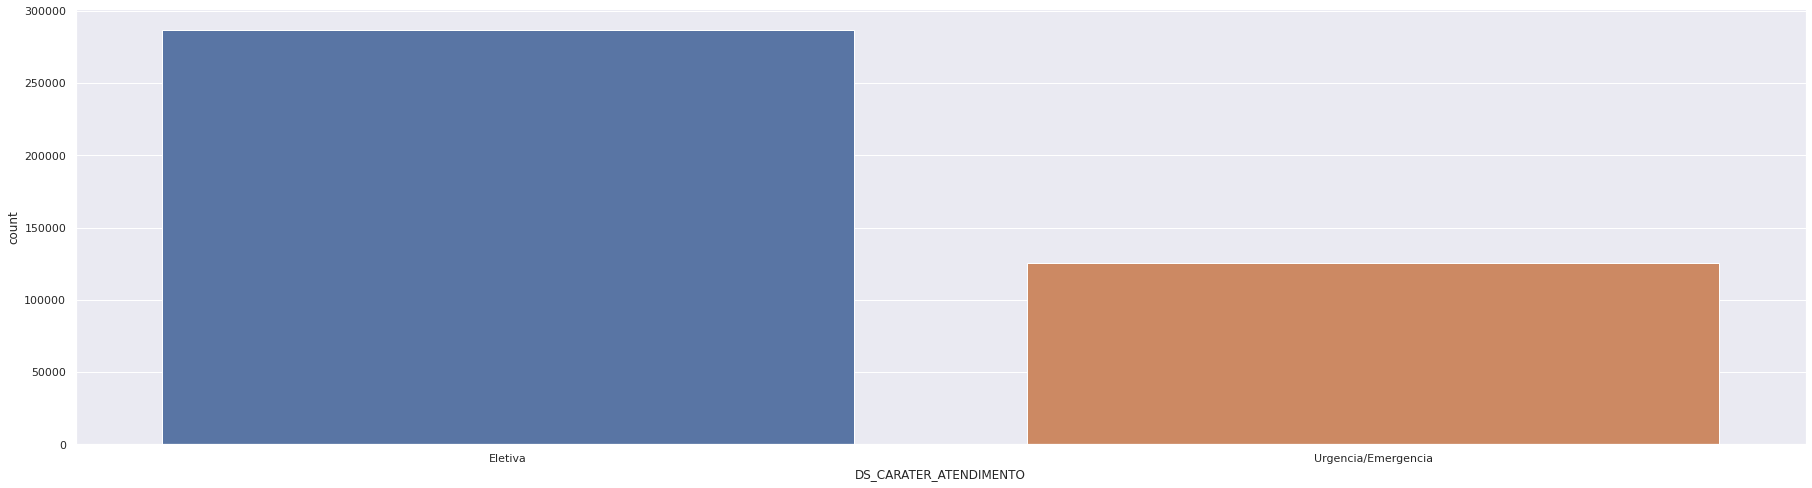

In [ ]:
# df.'DS_CARATER_ATENDIMENTO', .value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_CARATER_ATENDIMENTO)

#### DS_CARATER_ATENDIMENTO

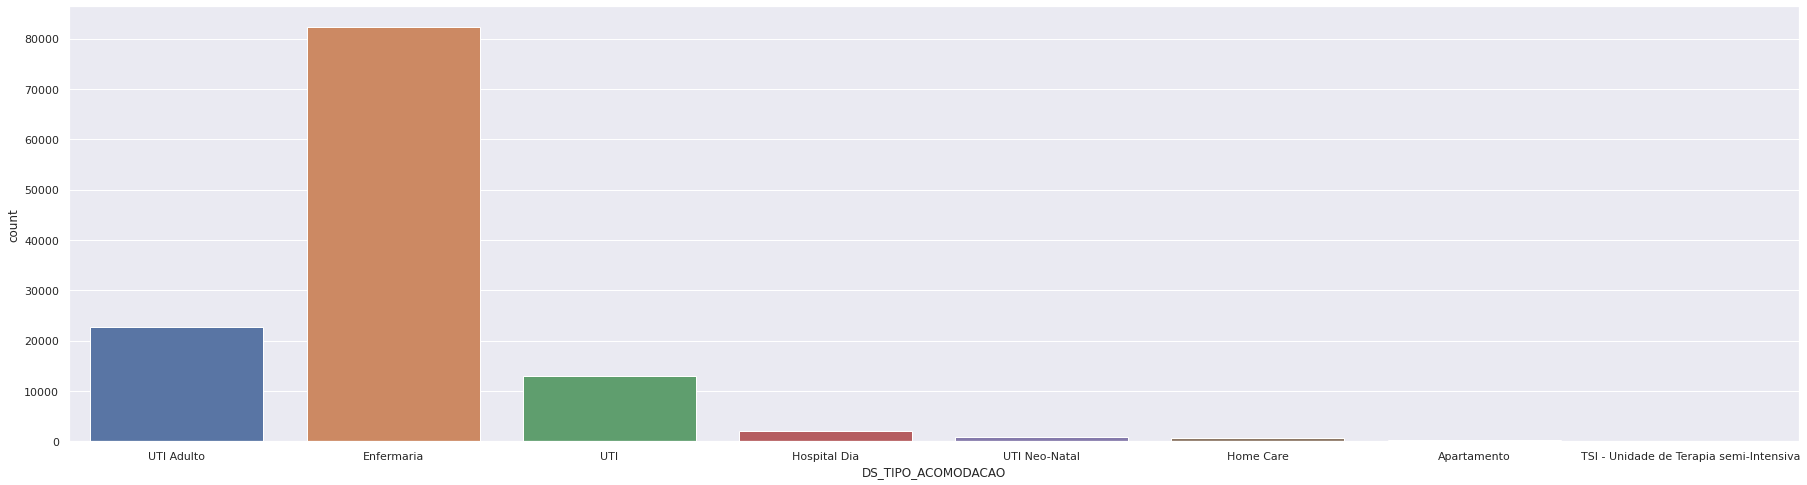

In [ ]:
# df.'DS_TIPO_ACOMODACAO', .value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_ACOMODACAO)

#### DS_CARATER_ATENDIMENTO

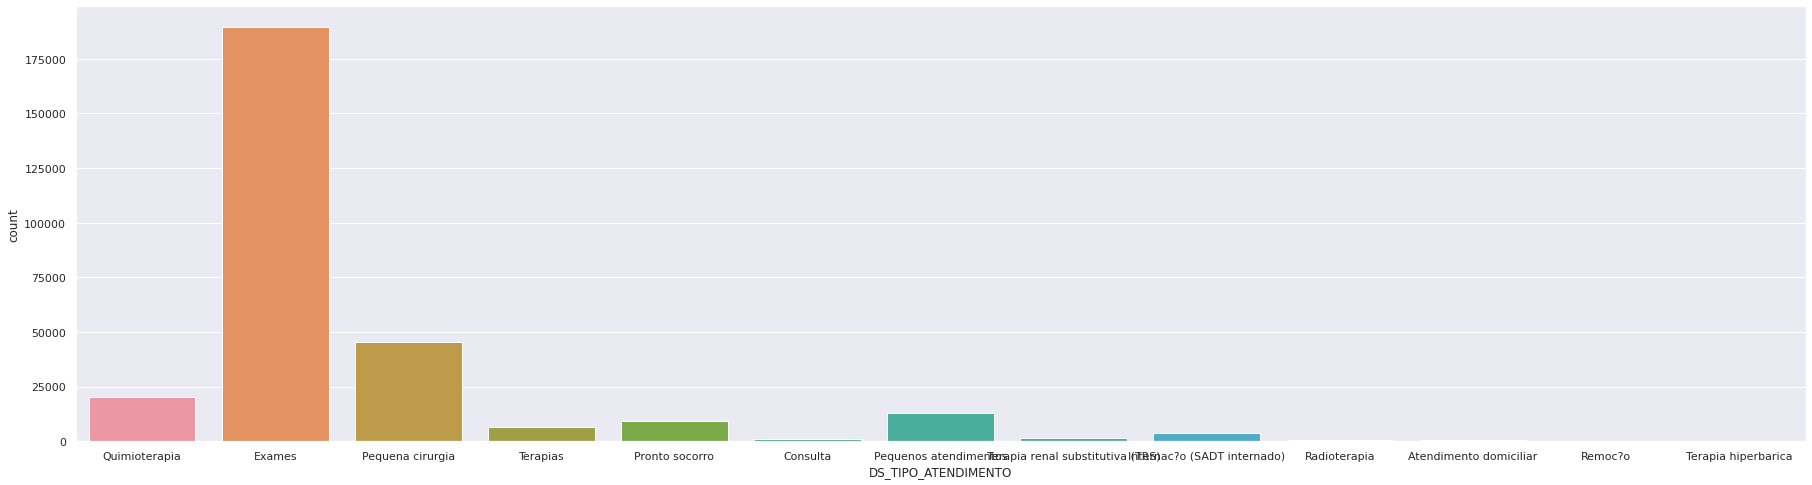

In [ ]:
# df.'DS_TIPO_ATENDIMENTO', .value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_ATENDIMENTO)

#### DS_TIPO_ATENDIMENTO

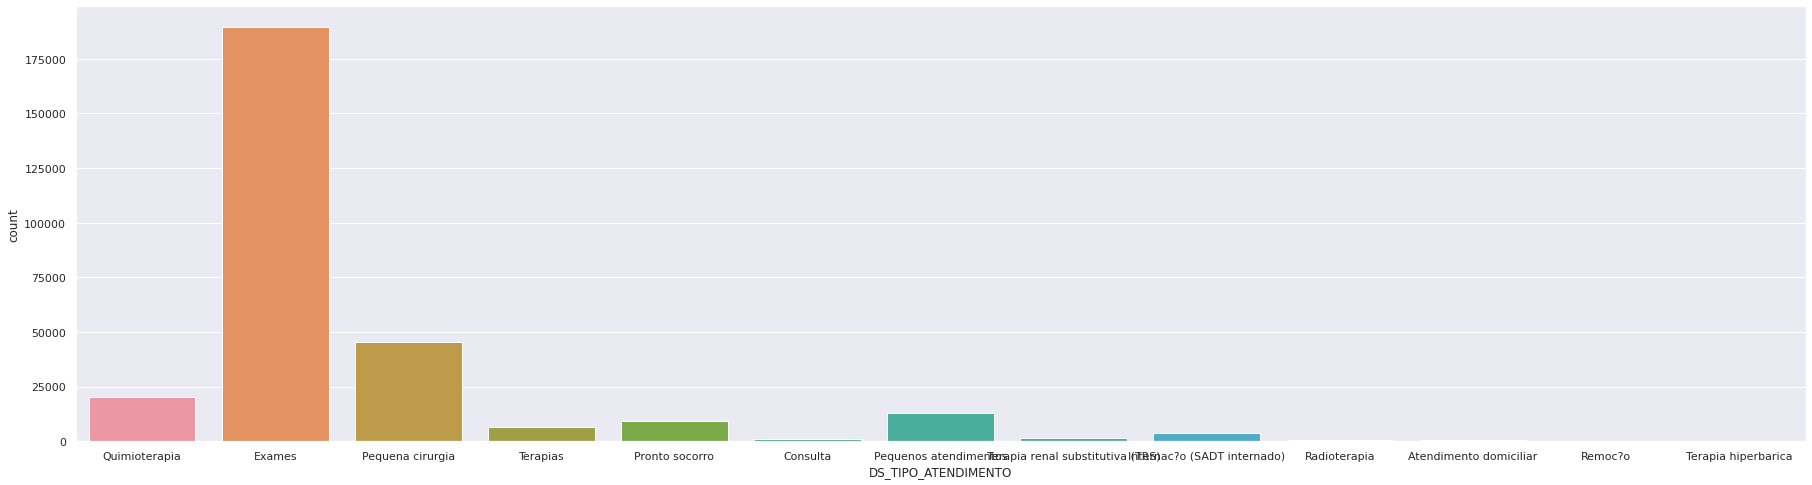

In [ ]:
# df.DS_TIPO_ATENDIMENTO.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_ATENDIMENTO)

#### CD_CID

In [ ]:
df.CD_CID.value_counts()
# sns.set(rc = {'figure.figsize':(31,8)})
# sns.countplot(df.CD_CID)

Z00     15377
H40     10580
B342     9484
Z10      9357
C50      6375
        ...  
Z039        1
I714        1
D232        1
S221        1
D61         1
Name: CD_CID, Length: 1902, dtype: int64

#### DS_INDICACAO_CLINICA

In [ ]:
# Verificação das características das categorias 'type'
df.DS_INDICACAO_CLINICA.value_counts()
# sns.set(rc = {'figure.figsize':(31,8)})
# sns.countplot(df.DS_INDICACAO_CLINICA)

EM ANEXO                                                7856
Em anexo                                                2089
GLAUCOMA                                                1702
em anexo                                                1635
CA DE MAMA                                              1273
                                                        ... 
Isolamento por Covid                                       1
LESAO MANGUITO ROTADOR + discopatia lombar                 1
DOR LOCAL INTENSA COM LIMITACAO DE MOVIMENTOS              1
TETRAPARESTESIA DE INICIO RECENTE                          1
RM OMBRO DIREITO E ESQUERDO , TENDINOPATIA  OMBROS.        1
Name: DS_INDICACAO_CLINICA, Length: 76280, dtype: int64

#### DS_TIPO_ITEM

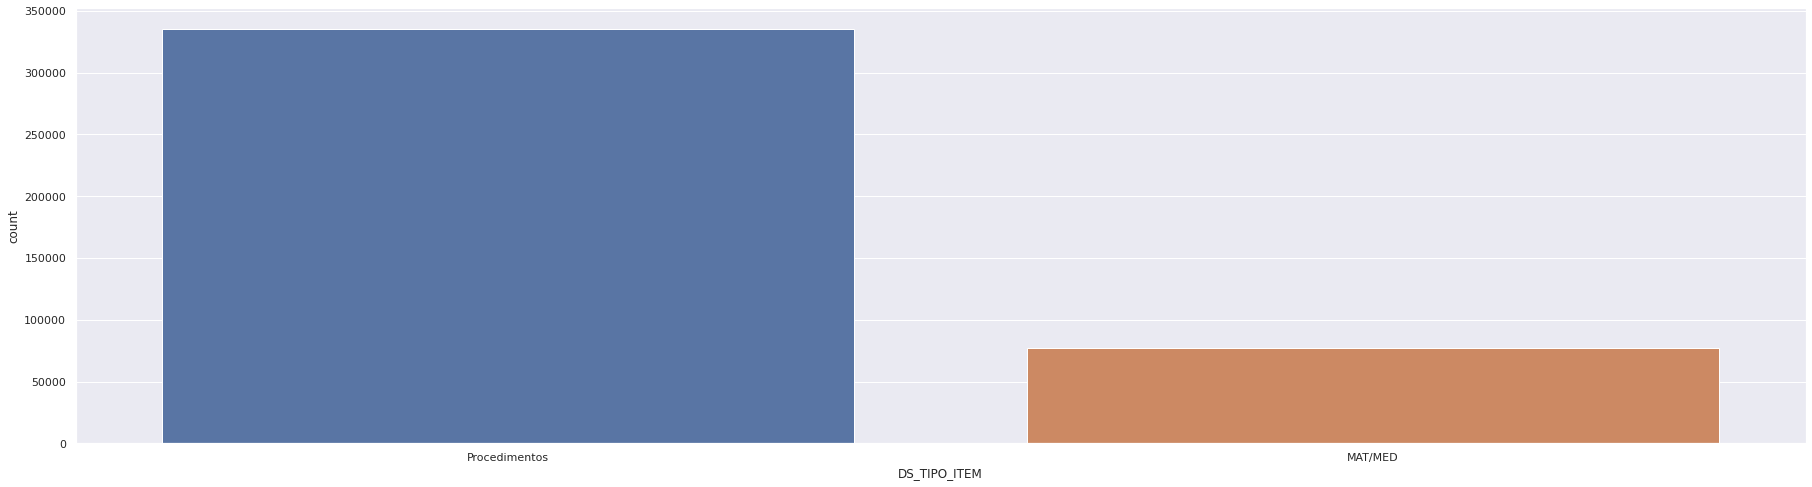

In [ ]:
# Verificação das características das categorias 'type'
# df.DS_TIPO_ITEM.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_TIPO_ITEM)

####DS_ITEM

In [ ]:
df.DS_ITEM.value_counts()
# sns.set(rc = {'figure.figsize':(31,8)})
# sns.countplot(df.DS_ITEM)

ENFERMARIA                                                                                                     8170
PAQUIMETRIA ULTRASSONICA - MONOCULAR                                                                           7554
PORTE 3 (CIRURGIA MEDIA)                                                                                       7451
MAPEAMENTO DE RETINA (OFTALMOSCOPIA INDIRETA) - MONOCULAR                                                      6845
USG - ULTRASSONOGRAFIA - ABDOME TOTAL (ABDOME SUPERIOR, RINS, BEXIGA, AORTA, VEIA CAVA INFERIOR E ADRENAIS)    6839
                                                                                                               ... 
FRESA ESFERICA CORTANTE 2,0X080MM - UN                                                                            1
STENT EPIC VASCULAR NITINOL OTW 06X040X120CM - UN                                                                 1
EQUIPO P/BOMBA IRRIGACAO AR 2VIAS - UN                                  

####DS_CLASSE

In [ ]:
df.DS_CLASSE.value_counts()
# sns.set(rc = {'figure.figsize':(31,8)})
# sns.countplot(df.DS_CLASSE)

PROCEDIMENTOS                                                                                 43439
ULTRA-SONOGRAFIA DIAGNOSTICA                                                                  36399
BIOQUIMICA                                                                                    27423
Material de consumo                                                                           27094
EM CENTRO CIRURGICO                                                                           21605
                                                                                              ...  
MALHA CIRURGICA IMPLANTAVEL                                                                       1
SISTEMA POSTERIOR DE COLUNA PARA FIXAC?O EM LAMINA, PEDICULO, APOFISE OU MACICO ARTICULAR.        1
CABECA METALICA PARA ARTROPLASTIA DE QUADRIL                                                      1
COMPRESSA ABSORVENTE PARA NEUROCIRURGIA                                                           1


####DS_SUBGRUPO

In [ ]:
df.DS_SUBGRUPO.value_counts()
# sns.set(rc = {'figure.figsize':(74,8)})
# sns.countplot(df.DS_SUBGRUPO)

MEDICINA LABORATORIAL                                                                      62140
Material Hospitalar                                                                        51344
ULTRA-SONOGRAFIA                                                                           36518
EXAMES ESPECIFICOS                                                                         33907
TAXA DE SALA                                                                               30245
                                                                                           ...  
SISTEMA CARDIOVASCULAR+SISTEMA RESPIRATORIO                                                    3
PRODUTOS DERMATOLOGICOS E MEMBRANAS MUCOSAS+SISTEMA GENITO URINARIO E HORMONIOS SEXUAIS        2
SISTEMA DIGESTIVO, METABOLISMO E NUTRICAO+SISTEMA GENITO URINARIO E HORMONIOS SEXUAIS          2
SISTEMA DIGESTIVO+METABOLISMO E NUTRICAO                                                       1
SANGUE E SISTEMA HEMATOPOETICO

####DS_GRUPO

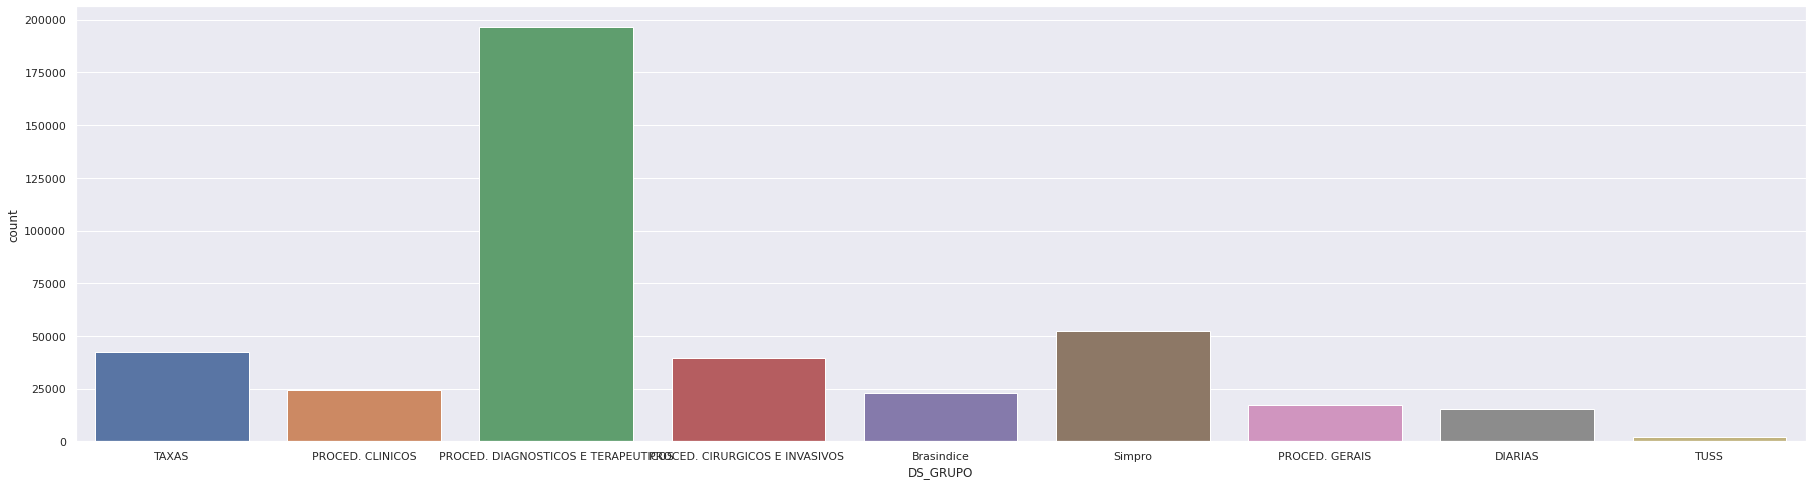

In [ ]:
# df.DS_GRUPO.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_GRUPO)

####DS_STATUS_ITEM

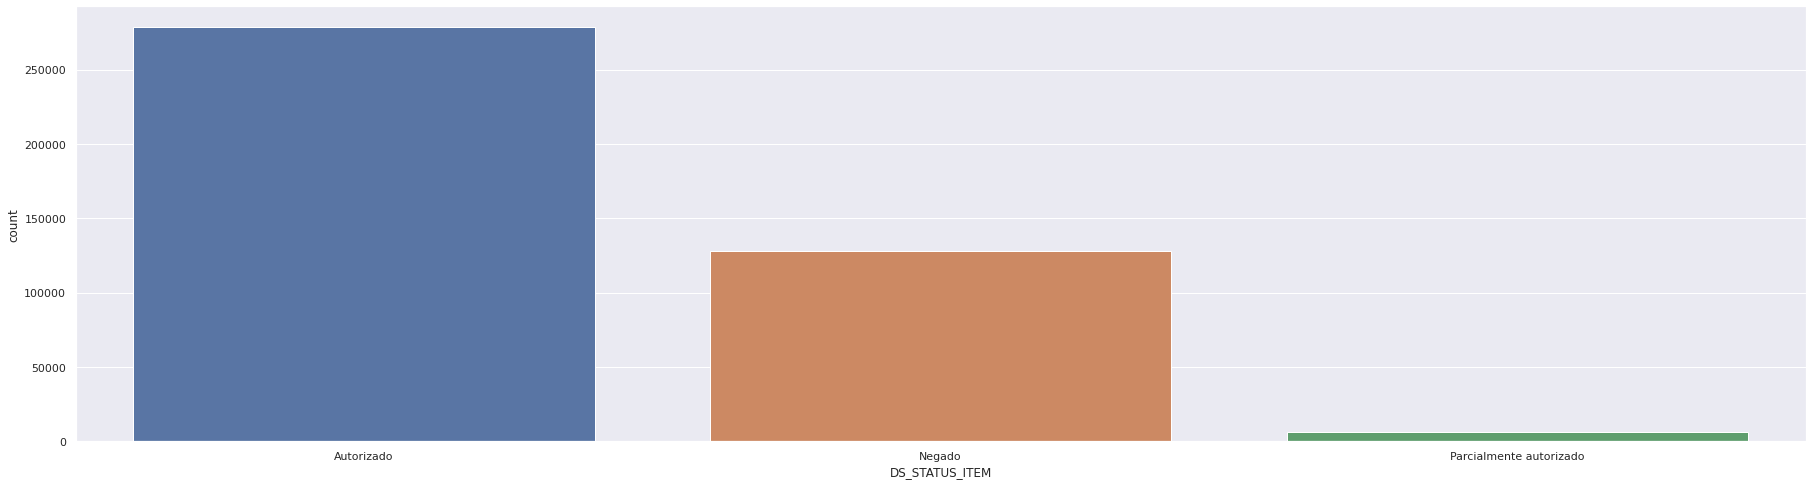

In [ ]:
# df.DS_STATUS_ITEM.value_counts()
sns.set(rc = {'figure.figsize':(31,8)})
sns.countplot(df.DS_STATUS_ITEM)

## Análise de correlação
**Qual é a correlação entre cada atributo?** 

In [ ]:
correlacao = df.corr()
correlacao

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DT_NASCIMENTO,NR_PRODUTO,QT_TEMPO_DOENCA,DS_TIPO_SAIDA,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,CD_ITEM,QT_SOLICITADA
NR_SEQ_REQUISICAO,1.000000,0.644921,0.999843,-0.049581,NaN,0.333073,NaN,-0.020638,0.981034,0.016366,0.000297
NR_SEQ_ITEM,0.644921,1.000000,0.644845,0.026050,NaN,0.202291,NaN,0.013269,0.508212,-0.114341,-0.001349
DT_REQUISICAO,0.999843,0.644845,1.000000,-0.049534,NaN,0.338338,NaN,-0.019249,0.980812,0.016398,0.000321
DT_NASCIMENTO,-0.049581,0.026050,-0.049534,1.000000,NaN,-0.176836,NaN,-0.104517,-0.052870,-0.031217,0.004499
NR_PRODUTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT_TEMPO_DOENCA,0.333073,0.202291,0.338338,-0.176836,NaN,1.000000,NaN,0.814799,-0.542600,0.059790,0.055368
DS_TIPO_SAIDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT_DIA_SOLICITADO,-0.020638,0.013269,-0.019249,-0.104517,NaN,0.814799,NaN,1.000000,-0.092297,0.012142,0.003571
CD_GUIA_REFERENCIA,0.981034,0.508212,0.980812,-0.052870,NaN,-0.542600,NaN,-0.092297,1.000000,-0.017494,-0.002502
CD_ITEM,0.016366,-0.114341,0.016398,-0.031217,NaN,0.059790,NaN,0.012142,-0.017494,1.000000,0.004045


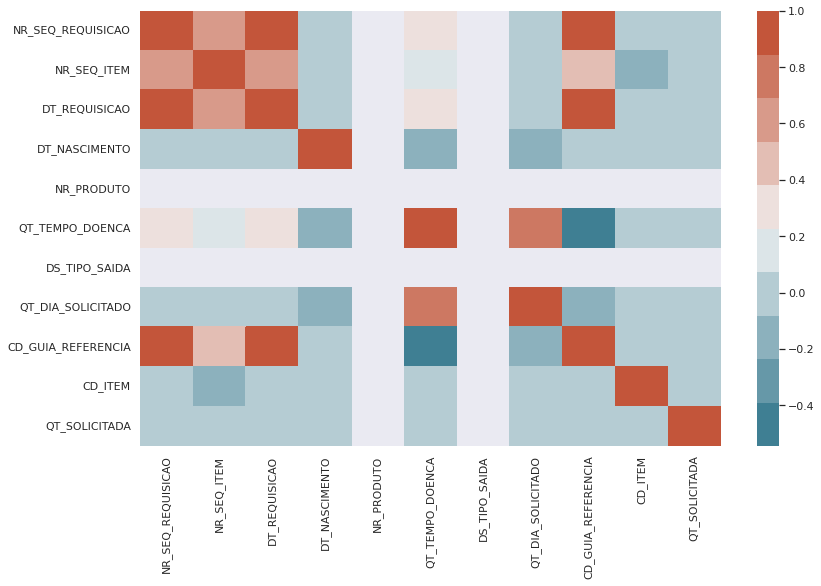

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(correlacao,
            cmap=sns.diverging_palette(220, 20, n=10))
plt.show()

## Verificação de balanceamento de DS_STATUS_ITEM
 

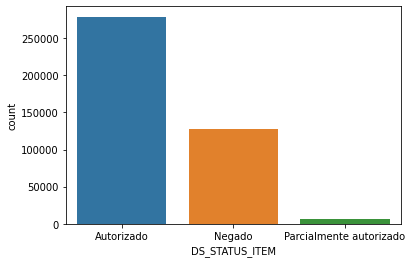

In [ ]:
sns.countplot(x="Status antes remover", data=df)
plt.show()

In [ ]:
# Substituindo "Parcialmente autorizado" por "Autorizado" em "DF_STATUS_ITEM"
df["DS_STATUS_ITEM"].replace(['Parcialmente autorizado'], 'Autorizado', inplace = True)

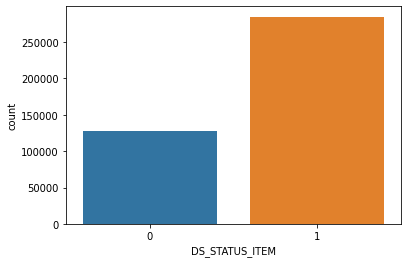

In [ ]:
sns.countplot(x="DS_STATUS_ITEM", data=df)
plt.show()

In [ ]:
df["DS_STATUS_ITEM"].unique()

array(['Autorizado', 'Negado'], dtype=object)

# Criação do Modelo

Esta seção engloba:
* Aplicação de diferentes algortimos de claficação;
* Teste de escalonamento e normalização de dados;
* Verificaão de diferentes encoders;

Além disso, engloba também a construção do modelo definitivo e geração do arquivo para submissão no Kaggle.


## Pré-processamento

In [ ]:
import pandas as pd 
import numpy as np


In [ ]:
def gera_porcentagem_faltantes(df):
  for coluna in df.columns:
    qtd_dados_faltantes = df[coluna].isna().sum()                                                             
    porcentagem = qtd_dados_faltantes*100/len(df)
    print("{}: {}".format(coluna, round(porcentagem, 2)))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Mineração de Dados [UFG]/0. base de dados/classificacao_binaria_train.csv', sep=';')
df["DS_STATUS_ITEM"].replace(['Parcialmente autorizado'], 'Autorizado', inplace = True)

In [ ]:
# Atributos definidos com base na análise exploratoria dos dados

df = df[['DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CARATER_ATENDIMENTO', 'CD_CID', 'DS_SUBGRUPO', 'DS_CLASSE', 'DS_TIPO_GUIA', 'DS_GRUPO', 'DS_INDICACAO_ACIDENTE', 
         'DS_CBO','NR_SEQ_REQUISICAO', 'DS_STATUS_ITEM']]

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(177495, 12)

In [ ]:
df['DS_STATUS_ITEM'].value_counts()

Autorizado    126398
Negado         51097
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['DS_STATUS_ITEM']), df['DS_STATUS_ITEM'])
df = pd.concat([X_resampled, y_resampled], axis='columns')

In [ ]:
df['DS_STATUS_ITEM'].value_counts()

Autorizado    51097
Negado        51097
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
dict_status = {'Autorizado':0, 'Negado':1}
df['DS_STATUS_ITEM'] = df['DS_STATUS_ITEM'].map(dict_status)

In [ ]:
df.dtypes

DT_NASCIMENTO                float64
DS_TIPO_PREST_SOLICITANTE     object
DS_CARATER_ATENDIMENTO        object
CD_CID                        object
DS_SUBGRUPO                   object
DS_CLASSE                     object
DS_TIPO_GUIA                  object
DS_GRUPO                      object
DS_INDICACAO_ACIDENTE         object
DS_CBO                        object
NR_SEQ_REQUISICAO              int64
DS_STATUS_ITEM                 int64
dtype: object

In [ ]:
df['DT_NASCIMENTO'] = df['DT_NASCIMENTO'].apply("int64")

In [ ]:
#Verificação de valores missing  
print('#### PORCENTAGEM DE DADOS FALTANTES\n')

gera_porcentagem_faltantes(df)

#### PORCENTAGEM DE DADOS FALTANTES

DT_NASCIMENTO: 0.0
DS_TIPO_PREST_SOLICITANTE: 0.0
DS_CARATER_ATENDIMENTO: 0.0
CD_CID: 0.0
DS_SUBGRUPO: 0.0
DS_CLASSE: 0.0
DS_TIPO_GUIA: 0.0
DS_GRUPO: 0.0
DS_INDICACAO_ACIDENTE: 0.0
DS_CBO: 0.0
NR_SEQ_REQUISICAO: 0.0
DS_STATUS_ITEM: 0.0


## Encodings 
Executar um metódo por vez.

###Target Enconding

In [ ]:
df.head(1)

,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CARATER_ATENDIMENTO,CD_CID,DS_SUBGRUPO,DS_CLASSE,DS_TIPO_GUIA,DS_GRUPO,DS_INDICACAO_ACIDENTE,DS_CBO,NR_SEQ_REQUISICAO,DS_STATUS_ITEM
0,2429082,HOSPITAL,Urgencia/Emergencia,I509,DIARIAS,DIARIAS,Guia de solicitac?o de prorrogac?o de internac?o,DIARIAS,N?o acidente,Medico clinico,1458911,0


In [ ]:
# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

mean_encode = df.groupby('DS_TIPO_PREST_SOLICITANTE')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_TIPO_PREST_SOLICITANTE'] = df['DS_TIPO_PREST_SOLICITANTE'].map(mean_encode)

mean_encode = df.groupby('DT_NASCIMENTO')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DT_NASCIMENTO'] = df['DT_NASCIMENTO'].map(mean_encode)

mean_encode = df.groupby('DS_CARATER_ATENDIMENTO')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_CARATER_ATENDIMENTO'] = df['DS_CARATER_ATENDIMENTO'].map(mean_encode)

mean_encode = df.groupby('CD_CID')['DS_STATUS_ITEM'].mean()
df.loc[:, 'CD_CID'] = df['CD_CID'].map(mean_encode)

mean_encode = df.groupby('DS_SUBGRUPO')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_SUBGRUPO'] = df['DS_SUBGRUPO'].map(mean_encode)

mean_encode = df.groupby('DS_CLASSE')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_CLASSE'] = df['DS_CLASSE'].map(mean_encode)

mean_encode = df.groupby('DS_TIPO_GUIA')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_TIPO_GUIA'] = df['DS_TIPO_GUIA'].map(mean_encode)

mean_encode = df.groupby('DS_GRUPO')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_GRUPO'] = df['DS_GRUPO'].map(mean_encode)

mean_encode = df.groupby('DS_INDICACAO_ACIDENTE')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_INDICACAO_ACIDENTE'] = df['DS_INDICACAO_ACIDENTE'].map(mean_encode)

mean_encode = df.groupby('DS_CBO')['DS_STATUS_ITEM'].mean()
df.loc[:, 'DS_CBO'] = df['DS_CBO'].map(mean_encode)

mean_encode = df.groupby('NR_SEQ_REQUISICAO')['DS_STATUS_ITEM'].mean()
df.loc[:, 'NR_SEQ_REQUISICAO'] = df['NR_SEQ_REQUISICAO'].map(mean_encode)

# mean_encode = df.groupby('DT_REQUISICAO')['DS_STATUS_ITEM'].mean()
# df.loc[:, 'DT_REQUISICAO'] = df['DT_REQUISICAO'].map(mean_encode)


In [ ]:
df

,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CARATER_ATENDIMENTO,CD_CID,DS_SUBGRUPO,DS_CLASSE,DS_TIPO_GUIA,DS_GRUPO,DS_INDICACAO_ACIDENTE,DS_CBO,NR_SEQ_REQUISICAO,DS_STATUS_ITEM
0,0.636364,0.609573,0.623313,0.384615,0.528302,0.528302,0.672809,0.528302,0.485784,0.517373,0.0,0
1,0.000000,0.490390,0.462760,0.428571,0.531234,0.374195,0.462082,0.513471,0.575487,0.517373,0.0,0
2,0.250000,0.609573,0.623313,0.642869,0.531234,0.544776,0.462082,0.513471,0.485784,0.517373,0.0,0
3,0.500000,0.609573,0.462760,0.333333,0.528302,0.528302,0.564332,0.528302,0.575487,0.517373,0.5,0
4,0.595506,0.609573,0.462760,0.307960,0.387223,0.281682,0.462082,0.433423,0.485784,0.517373,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102189,0.800000,0.433879,0.462760,0.687270,0.499729,0.499729,0.462082,0.513471,0.485784,0.504591,1.0,1
102190,0.600000,0.490390,0.462760,0.418969,0.531234,0.682373,0.462082,0.513471,0.485784,0.517373,1.0,1
102191,0.666667,0.433879,0.462760,0.530120,0.541985,0.516393,0.462082,0.523978,0.485784,0.373737,1.0,1
102192,1.000000,0.609573,0.623313,1.000000,0.531234,0.682373,0.672809,0.513471,0.575487,0.517373,1.0,1


### Count or frequency encoding
 

In [ ]:
df.head(0)

,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CARATER_ATENDIMENTO,CD_CID,DS_SUBGRUPO,DS_CLASSE,DS_TIPO_GUIA,DS_GRUPO,DS_INDICACAO_ACIDENTE,DS_CBO,NR_SEQ_REQUISICAO,DT_REQUISICAO,DS_STATUS_ITEM


In [ ]:
#https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9#:~:text=like%20Logistic%20Regression.-,Count%20or%20frequency%20encoding,-First%20step%20is

# create the dictionary
count_map_dt_nascimento = df['DT_NASCIMENTO'].value_counts().to_dict()
count_map_ds_prest = df['DS_TIPO_PREST_SOLICITANTE'].value_counts().to_dict()
count_map_ds_atend = df['DS_CARATER_ATENDIMENTO'].value_counts().to_dict()
count_map_cid = df['CD_CID'].value_counts().to_dict()
count_map_ds_subg = df['DS_SUBGRUPO'].value_counts().to_dict()
count_map_ds_guia = df['DS_TIPO_GUIA'].value_counts().to_dict()
count_map_ds_grupo = df['DS_GRUPO'].value_counts().to_dict()
count_map_ds_classe = df['DS_CLASSE'].value_counts().to_dict()
count_map_ds_ind= df['DS_INDICACAO_ACIDENTE'].value_counts().to_dict()
count_map_ds_cbo = df['DS_CBO'].value_counts().to_dict()
count_map_seq_req = df['NR_SEQ_REQUISICAO'].value_counts().to_dict()
count_map_dt_req= df['DT_REQUISICAO'].value_counts().to_dict()
# Map the column with dictionary
df['DS_CLASSE'] = df['DS_CLASSE'].map(count_map_ds_classe)
df['DT_NASCIMENTO'] = df['DT_NASCIMENTO'].map(count_map_dt_nascimento)
df['DS_TIPO_PREST_SOLICITANTE'] = df['DS_TIPO_PREST_SOLICITANTE'].map(count_map_ds_prest) 
df['DS_CARATER_ATENDIMENTO'] = df['DS_CARATER_ATENDIMENTO'].map(count_map_ds_atend)
df['CD_CID'] = df['CD_CID'].map(count_map_cid) 
df['DS_SUBGRUPO'] = df['DS_SUBGRUPO'].map(count_map_ds_subg) 
df['DS_TIPO_GUIA'] = df['DS_TIPO_GUIA'].map(count_map_ds_guia) 
df['DS_GRUPO'] = df['DS_GRUPO'].map(count_map_ds_grupo)
df['DS_INDICACAO_ACIDENTE'] = df['DS_INDICACAO_ACIDENTE'].map(count_map_ds_ind)
df['DS_CBO'] = df['DS_CBO'].map(count_map_ds_cbo)
df['NR_SEQ_REQUISICAO'] = df['NR_SEQ_REQUISICAO'].map(count_map_seq_req)
df['DT_REQUISICAO'] = df['DT_REQUISICAO'].map(count_map_dt_req) 


In [ ]:
df['DS_STATUS_ITEM'].value_counts()

0    51097
1    51097
Name: DS_STATUS_ITEM, dtype: int64

### Probability Ratio Encoding

In [ ]:
df.head(3)

,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CARATER_ATENDIMENTO,CD_CID,DS_SUBGRUPO,DS_CLASSE,DS_TIPO_GUIA,DS_GRUPO,DS_INDICACAO_ACIDENTE,DS_CBO,NR_SEQ_REQUISICAO,DT_REQUISICAO,DS_STATUS_ITEM
0,2429082,HOSPITAL,Urgencia/Emergencia,I509,DIARIAS,DIARIAS,Guia de solicitac?o de prorrogac?o de internac?o,DIARIAS,N?o acidente,Medico clinico,1458911,2459542,0
1,2438342,LABORATORIO,Eletiva,Z008,MEDICINA LABORATORIAL,ENDOCRINOLOGIA LABORATORIAL,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,Outros,Medico clinico,642753,2459108,0
2,2444117,HOSPITAL,Urgencia/Emergencia,Z10,MEDICINA LABORATORIAL,BIOQUIMICA,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,N?o acidente,Medico clinico,1402326,2459513,0


In [ ]:
# https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9#:~:text=like%20Logistic%20Regression.-,Count%20or%20frequency%20encoding,-First%20step%20is
# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

for name, values in df.iteritems():
  if name != 'DS_STATUS_ITEM':
    pr_df = df.groupby(name)['DS_STATUS_ITEM'].mean()
    pr_df = pd.DataFrame(pr_df)
    pr_df = pr_df.rename(columns = {'DS_STATUS_ITEM': 'Good'})
    pr_df['Bad'] = 1-pr_df.Good
    pr_df['Bad'] = np.where(pr_df['Bad'] == 0, 0.000001, pr_df['Bad'])
    pr_df['PR'] = pr_df.Good/pr_df.Bad

    df.loc[:, name] = df[name].map(pr_df['PR'])

df

,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CARATER_ATENDIMENTO,CD_CID,DS_SUBGRUPO,DS_CLASSE,DS_TIPO_GUIA,DS_GRUPO,DS_INDICACAO_ACIDENTE,DS_CBO,NR_SEQ_REQUISICAO,DT_REQUISICAO,DS_STATUS_ITEM
0,1.750000,1.561301,1.654721,0.625000,1.120000,1.120000,2.056316,1.120000,0.944708,1.071995,0.0,0.588235,0
1,0.000000,0.962283,0.861364,0.750000,1.133260,0.597943,0.859018,1.055376,1.355641,1.071995,0.0,0.453125,0
2,0.333333,1.561301,1.654721,1.800092,1.133260,1.196721,0.859018,1.055376,0.944708,1.071995,0.0,1.281250,0
3,1.000000,1.561301,0.861364,0.500000,1.120000,1.120000,1.295327,1.120000,1.355641,1.071995,1.0,1.376404,0
4,1.472222,1.561301,0.861364,0.445002,0.631915,0.392141,0.859018,0.764985,0.944708,1.071995,0.0,0.468354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102189,4.000000,0.766406,0.861364,2.197647,0.998917,0.998917,0.859018,1.055376,0.944708,1.018533,1000000.0,3.552941,1
102190,1.500000,0.962283,0.861364,0.721080,1.133260,2.148346,0.859018,1.055376,0.944708,1.071995,1000000.0,0.470817,1
102191,2.000000,0.766406,0.861364,1.128205,1.183333,1.067797,0.859018,1.100743,0.944708,0.596774,1000000.0,0.761905,1
102192,1000000.000000,1.561301,1.654721,1000000.000000,1.133260,2.148346,2.056316,1.055376,1.355641,1.071995,1000000.0,2.049587,1


### Label Encoder

In [ ]:
# from collections import defaultdict
# from sklearn.preprocessing import LabelEncoder

# df = pd.DataFrame(X_data)
                  
# d = defaultdict(LabelEncoder)

# # Encoding the variable
# fit = df.apply(lambda x: d[x.name].fit_transform(x))

# # Inverse the encoded
# fit.apply(lambda x: d[x.name].inverse_transform(x))

# # Using the dictionary to label future data
# X_data = df.apply(lambda x: d[x.name].transform(x))

# X_data = X_data.iloc[:, 0:12].values

##Pré-treino

### Divisão entre previsores e classe

In [ ]:
df.shape

(102194, 12)

In [ ]:
X_data = df.iloc[:, 0:11].values
X_data[0]

array([0.63636364, 0.60957337, 0.62331252, 0.38461538, 0.52830189,
       0.52830189, 0.67280869, 0.52830189, 0.48578397, 0.51737326,
       0.        ])

In [ ]:
y_data= df.iloc[:, 11].values

In [ ]:
y_data.shape

(102194,)

In [ ]:
y_data[0]

0

### Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()
X_data = scaler_data.fit_transform(X_data)
X_data

array([[ 4.33734563e-01,  1.39847834e+00,  1.81968555e+00, ...,
        -4.31357441e-01,  2.11038169e-01, -1.05103531e+00],
       [-1.59036006e+00, -1.22657797e-01, -5.49545498e-01, ...,
         2.29050823e+00,  2.11038169e-01, -1.05103531e+00],
       [-7.95180032e-01,  1.39847834e+00,  1.81968555e+00, ...,
        -4.31357441e-01,  2.11038169e-01, -1.05103531e+00],
       ...,
       [ 5.30120021e-01, -8.43900061e-01, -5.49545498e-01, ...,
        -4.31357441e-01, -1.53375018e+00,  1.05103531e+00],
       [ 1.59036006e+00,  1.39847834e+00,  1.81968555e+00, ...,
         2.29050823e+00,  2.11038169e-01,  1.05103531e+00],
       [-2.83214806e-01, -8.43900061e-01, -5.49545498e-01, ...,
         2.29050823e+00, -2.43596816e+00,  1.16688360e-16]])

In [ ]:
X_data.shape

(102194, 11)

###Divisão train e test

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_data_treinamento, X_data_teste, y_data_treinamento, y_data_teste = train_test_split(X_data, y_data, test_size = 0.3, random_state = 0)
X_data_teste.shape, y_data_teste.shape

((30659, 11), (30659,))

### Redução da Dimensionalidade

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_data_treinamento = pca.fit_transform(X_data_treinamento)
X_data_teste = pca.transform(X_data_teste)

## Etapa de Treinamento

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

###DecisionTreeClassifier com análise de Overfiting

In [ ]:
# https://machinelearningmastery.com/overfitting-machine-learning-models/

# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

train_scores = []
test_scores = []
values = [i for i in range(1, 25)]

# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_data_treinamento, y_data_treinamento)
	# evaluate on the train dataset
	train_yhat = model.predict(X_data_treinamento)
	train_acc = accuracy_score(y_data_treinamento, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_data_teste)
	test_acc = accuracy_score(y_data_teste, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.962, test: 0.962
>2, train: 0.962, test: 0.962
>3, train: 0.965, test: 0.964
>4, train: 0.965, test: 0.964
>5, train: 0.965, test: 0.964
>6, train: 0.966, test: 0.965
>7, train: 0.968, test: 0.966
>8, train: 0.969, test: 0.966
>9, train: 0.970, test: 0.967
>10, train: 0.972, test: 0.966
>11, train: 0.973, test: 0.965
>12, train: 0.975, test: 0.965
>13, train: 0.977, test: 0.964
>14, train: 0.979, test: 0.964
>15, train: 0.981, test: 0.963
>16, train: 0.982, test: 0.961
>17, train: 0.983, test: 0.962
>18, train: 0.984, test: 0.961
>19, train: 0.985, test: 0.961
>20, train: 0.986, test: 0.960
>21, train: 0.987, test: 0.960
>22, train: 0.987, test: 0.959
>23, train: 0.987, test: 0.959
>24, train: 0.988, test: 0.959


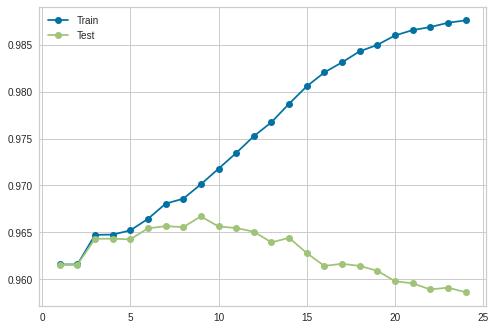

In [ ]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

###RandomForest

#### Tuning dos parâmetros com GridSearch

In [ ]:
# parametros = {'criterion': ['gini', 'entropy'],
#               'n_estimators': [10, 40, 100, 150],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 5, 10]}

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
# grid_search.fit(X_data, y_data)
# melhores_parametros = grid_search.best_params_
# melhor_resultado = grid_search.best_score_
# print(melhores_parametros)
# print(melhor_resultado)

**Parametros de acordo com o metódo encoder aplicado.**

Target Enconding:

* n_estimators=150, criterion = 'entropy', min_samples_split = 10, min_samples_leaf= 10

Prob Encoder 
* 'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 150


#### Treinamento

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=150, criterion = 'entropy', min_samples_split = 10, min_samples_leaf= 10)
random_forest.fit(X_data_treinamento, y_data_treinamento)

RandomForestClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10, n_estimators=150)

In [ ]:
previsoes = random_forest.predict(X_data_teste)
previsoes

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_data_teste, previsoes)

0.9674157669852246

0.9674157669852246

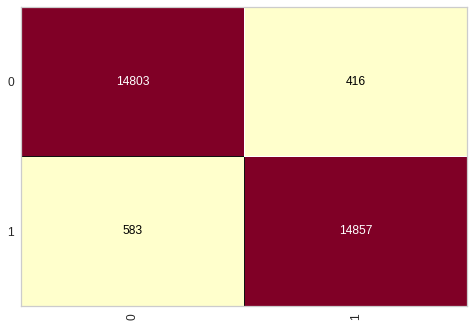

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_data_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15219
           1       0.97      0.96      0.97     15440

    accuracy                           0.97     30659
   macro avg       0.97      0.97      0.97     30659
weighted avg       0.97      0.97      0.97     30659



In [ ]:
# https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

from sklearn.metrics import precision_score, recall_score, f1_score

# These values are the same as in the table above
labels      = y_data_teste
predicitons = previsoes
print("Precision (micro): %f" % precision_score(labels, predicitons, average='micro'))
print("Recall (micro):    %f" % recall_score(labels, predicitons, average='micro'))
print("F1 score (micro):  %f" % f1_score(labels, predicitons, average='micro'), end='\n\n')
print("Precision (macro): %f" % precision_score(labels, predicitons, average='macro'))
print("Recall (macro):    %f" % recall_score(labels, predicitons, average='macro'))
print("F1 score (macro):  %f" % f1_score(labels, predicitons, average='macro'), end='\n\n')
print("Precision (weighted): %f" % precision_score(labels, predicitons, average='weighted'))
print("Recall (weighted):    %f" % recall_score(labels, predicitons, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(labels, predicitons, average='weighted'))

Precision (micro): 0.966829
Recall (micro):    0.966829
F1 score (micro):  0.966829

Precision (macro): 0.966843
Recall (macro):    0.966863
F1 score (macro):  0.966829

Precision (weighted): 0.966879
Recall (weighted):    0.966829
F1 score (weighted):  0.966829


### Redes Neurais

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_data_teste.shape, y_data_teste.shape

((30659, 11), (30659,))

In [ ]:
(8 + 1) / 2

4.5

In [ ]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (5,5))
rede_neural.fit(X_data_treinamento, y_data_treinamento)

Iteration 1, loss = 0.65849380
Iteration 2, loss = 0.40438824
Iteration 3, loss = 0.23473069
Iteration 4, loss = 0.09877307
Iteration 5, loss = 0.08780822
Iteration 6, loss = 0.08577335
Iteration 7, loss = 0.08482526
Iteration 8, loss = 0.08435553
Iteration 9, loss = 0.08415752
Iteration 10, loss = 0.08389552
Iteration 11, loss = 0.08376025
Iteration 12, loss = 0.08361405
Iteration 13, loss = 0.08354521
Iteration 14, loss = 0.08348521
Iteration 15, loss = 0.08338427
Iteration 16, loss = 0.08332415
Iteration 17, loss = 0.08324514
Iteration 18, loss = 0.08322546
Iteration 19, loss = 0.08319738
Iteration 20, loss = 0.08311714
Iteration 21, loss = 0.08316696
Iteration 22, loss = 0.08322387
Iteration 23, loss = 0.08307798
Iteration 24, loss = 0.08311266
Iteration 25, loss = 0.08295441
Iteration 26, loss = 0.08298869
Iteration 27, loss = 0.08298419
Iteration 28, loss = 0.08297735
Iteration 29, loss = 0.08300617
Iteration 30, loss = 0.08291471
Iteration 31, loss = 0.08292042
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, tol=1e-05, verbose=True)

In [ ]:
previsoes = rede_neural.predict(X_data_teste)
previsoes

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_data_teste, previsoes)

0.9637952966502495

0.9637952966502495

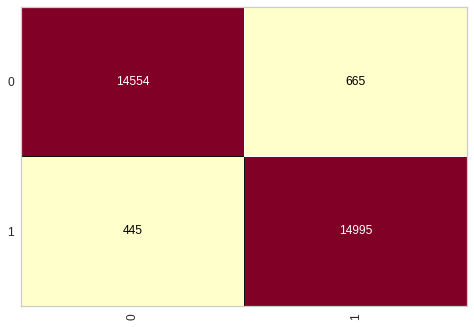

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)

In [ ]:
print(classification_report(y_data_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     15219
           1       0.96      0.97      0.96     15440

    accuracy                           0.96     30659
   macro avg       0.96      0.96      0.96     30659
weighted avg       0.96      0.96      0.96     30659



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# These values are the same as in the table above
labels      = y_data_teste
predicitons = previsoes
print("Precision (micro): %f" % precision_score(labels, predicitons, average='micro'))
print("Recall (micro):    %f" % recall_score(labels, predicitons, average='micro'))
print("F1 score (micro):  %f" % f1_score(labels, predicitons, average='micro'), end='\n\n')
print("Precision (macro): %f" % precision_score(labels, predicitons, average='macro'))
print("Recall (macro):    %f" % recall_score(labels, predicitons, average='macro'))
print("F1 score (macro):  %f" % f1_score(labels, predicitons, average='macro'), end='\n\n')
print("Precision (weighted): %f" % precision_score(labels, predicitons, average='weighted'))
print("Recall (weighted):    %f" % recall_score(labels, predicitons, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(labels, predicitons, average='weighted'))

Precision (micro): 0.963795
Recall (micro):    0.963795
F1 score (micro):  0.963795

Precision (macro): 0.963933
Recall (macro):    0.963742
F1 score (macro):  0.963788

Precision (weighted): 0.963887
Recall (weighted):    0.963795
F1 score (weighted):  0.963792


### KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_data_treinamento, y_data_treinamento)

previsoes = knn_model.predict(X_data_teste)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_data_teste, previsoes)

0.9630451091033628

In [ ]:
previsoes

array([1, 0, 0, ..., 1, 1, 0])

0.9630451091033628

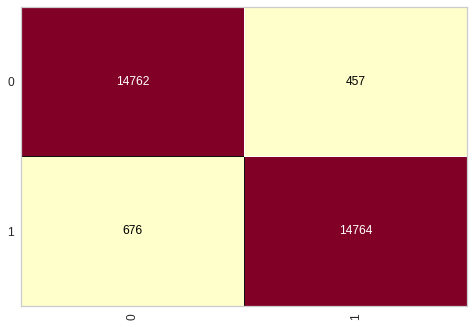

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_model)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)

In [ ]:
print(classification_report(y_data_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     15219
           1       0.97      0.96      0.96     15440

    accuracy                           0.96     30659
   macro avg       0.96      0.96      0.96     30659
weighted avg       0.96      0.96      0.96     30659



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# These values are the same as in the table above
labels      = y_data_teste
predicitons = previsoes
print("Precision (micro): %f" % precision_score(labels, predicitons, average='micro'))
print("Recall (micro):    %f" % recall_score(labels, predicitons, average='micro'))
print("F1 score (micro):  %f" % f1_score(labels, predicitons, average='micro'), end='\n\n')
print("Precision (macro): %f" % precision_score(labels, predicitons, average='macro'))
print("Recall (macro):    %f" % recall_score(labels, predicitons, average='macro'))
print("F1 score (macro):  %f" % f1_score(labels, predicitons, average='macro'), end='\n\n')
print("Precision (weighted): %f" % precision_score(labels, predicitons, average='weighted'))
print("Recall (weighted):    %f" % recall_score(labels, predicitons, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(labels, predicitons, average='weighted'))

Precision (micro): 0.963045
Recall (micro):    0.963045
F1 score (micro):  0.963045

Precision (macro): 0.963094
Recall (macro):    0.963095
F1 score (macro):  0.963045

Precision (weighted): 0.963143
Recall (weighted):    0.963045
F1 score (weighted):  0.963045


### SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_data_treinamento, y_data_treinamento)

previsoes = svm_model.predict(X_data_teste)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_data_teste, previsoes)

0.9639257640497081

In [ ]:
previsoes

array([1, 0, 0, ..., 1, 1, 0])

0.9639257640497081

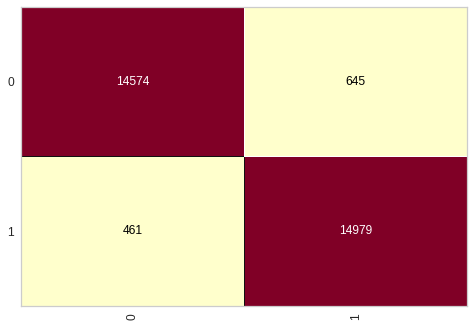

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_model)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# These values are the same as in the table above
labels      = y_data_teste
predicitons = previsoes
print("Precision (micro): %f" % precision_score(labels, predicitons, average='micro'))
print("Recall (micro):    %f" % recall_score(labels, predicitons, average='micro'))
print("F1 score (micro):  %f" % f1_score(labels, predicitons, average='micro'), end='\n\n')
print("Precision (macro): %f" % precision_score(labels, predicitons, average='macro'))
print("Recall (macro):    %f" % recall_score(labels, predicitons, average='macro'))
print("F1 score (macro):  %f" % f1_score(labels, predicitons, average='macro'), end='\n\n')
print("Precision (weighted): %f" % precision_score(labels, predicitons, average='weighted'))
print("Recall (weighted):    %f" % recall_score(labels, predicitons, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(labels, predicitons, average='weighted'))

Precision (micro): 0.963926
Recall (micro):    0.963926
F1 score (micro):  0.963926

Precision (macro): 0.964028
Recall (macro):    0.963881
F1 score (macro):  0.963919

Precision (weighted): 0.963990
Recall (weighted):    0.963926
F1 score (weighted):  0.963923


##Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
  scores = cross_val_score(rede_neural, X_data, y_data, cv = kfold)
  resultados_rede_neural.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_data, y_data, cv = kfold)
  resultados_random_forest.append(scores.mean())

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_data, y_data, cv = kfold)
  resultados_arvore.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_data, y_data, cv = kfold)
  resultados_knn.append(scores.mean())



0
1


In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})

resultados.to_csv('/content/drive/MyDrive/Trabalho Mineração de Dados [UFG]/resultados_validacao_cruzada.csv')
resultados.to_csv('/content/resultados_validacao_cruzada.csv')
files.download('resultados_validacao_cruzada.csv')
!cp resultados_validacao_cruzada.csv "/content/drive/My Drive/resultados_validacao_cruzada.csv"

In [ ]:
pd.read_csv('/content/resultados_validacao_cruzada.csv')

,Unnamed: 0,Arvore,Random forest,KNN,Rede neural
0,0,0.957307,0.960624,0.962503,0.965106
1,1,0.956817,0.960800,0.961201,0.964851
2,2,0.957493,0.961240,0.961465,0.965106
3,3,0.957307,0.961534,0.961465,0.965928


Resutados dísponiveis em:
* https://drive.google.com/file/d/182ElGtmXU-0sXw30uCshyNmaDRCCSeat/view?usp=sharing

# Geração de arquivo para submissão

In [ ]:
!pip install pip install category_encoders

In [ ]:
import pandas as pd 
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Trabalho Mineração de Dados [UFG]/0. base de dados/classificacao_binaria_train.csv', sep=';')
df["DS_STATUS_ITEM"].replace(['Parcialmente autorizado'], 'Autorizado', inplace = True)

df = df[['DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CARATER_ATENDIMENTO', 'CD_CID', 'DS_SUBGRUPO', 'DS_CLASSE', 'DS_TIPO_GUIA', 'DS_GRUPO', 'DS_INDICACAO_ACIDENTE', 
         'DS_CBO','NR_SEQ_REQUISICAO', 'DS_STATUS_ITEM']]

df = df.dropna()

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['DS_STATUS_ITEM']), df['DS_STATUS_ITEM'])
df = pd.concat([X_resampled, y_resampled], axis='columns')

dict_status = {'Autorizado':0, 'Negado':1}
df['DS_STATUS_ITEM'] = df['DS_STATUS_ITEM'].map(dict_status)

In [ ]:
df_test

,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CARATER_ATENDIMENTO,CD_CID,DS_SUBGRUPO,DS_CLASSE,DS_TIPO_GUIA,DS_GRUPO,DS_INDICACAO_ACIDENTE,DS_CBO,NR_SEQ_REQUISICAO
0,2451529.0,CLINICA,Eletiva,H40,EXAMES ESPECIFICOS,PROCEDIMENTOS,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,N?o acidente,Medico oftalmologista,640397
1,2432027.0,LABORATORIO,Eletiva,NaN,MEDICINA LABORATORIAL,IMUNOLOGIA,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,N?o acidente,Medico endocrinologista e metabologista,897240
2,2439123.0,CLINICA,Eletiva,H353,OUTROS,PROCEDIMENTOS DIAGNOSTICOS,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,N?o acidente,Medico oftalmologista,636323
3,2448718.0,CLINICA,Eletiva,NaN,ULTRA-SONOGRAFIA,ULTRA-SONOGRAFIA DIAGNOSTICA,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,N?o acidente,Medico ginecologista e obstetra,1425891
4,2448463.0,CLINICA,Eletiva,NaN,EXAMES ESPECIFICOS,PROCEDIMENTOS,Guia de solicitac?o SP/SADT,PROCED. DIAGNOSTICOS E TERAPEUTICOS,NaN,Medico reumatologista,1300316
...,...,...,...,...,...,...,...,...,...,...,...
103131,2433458.0,HOSPITAL,Urgencia/Emergencia,NaN,DIARIAS,DIARIAS,Guia de solicitac?o de prorrogac?o de internac?o,DIARIAS,NaN,Medico cardiologista,1002337
103132,2438887.0,HOSPITAL,Urgencia/Emergencia,N188,PROCEDIMENTOS CLINICOS HOSPITALARES,REABILITAC?ES - SESS?ES,Guia de solicitac?o de prorrogac?o de internac?o,PROCED. CLINICOS,Outros,Medico clinico,1229314
103133,2431527.0,CLINICA,Eletiva,NaN,"SISTEMA DIGESTIVO, METABOLISMO E NUTRICAO+SIST...",ANTIEMETICOS E ANTINAUSEANTES,Guia de solicitac?o SP/SADT,Brasindice,N?o acidente,Medico ortopedista e traumatologista,1502406
103134,2432513.0,HOSPITAL,Urgencia/Emergencia,NaN,TAXA DE SERVICO,TAXA DE SERVICO,Guia de solicitac?o internac?o,TAXAS,N?o acidente,Medico infectologista,1034981


In [ ]:
import pandas as pd 
import numpy as np
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

# Balancemanto
from imblearn.under_sampling import RandomUnderSampler
# Escaonamento dos dados
from sklearn.preprocessing import StandardScaler
# Divisao Train e Test
from sklearn.model_selection import train_test_split
# Redução da Dimensionalidade
from sklearn.decomposition import PCA

#RandomForest
from sklearn.ensemble import RandomForestClassifier

################### PRÉ-PROCESSAMENTO ###################
#########################################################

df_test = pd.read_csv('/content/drive/MyDrive/Trabalho Mineração de Dados [UFG]/0. base de dados/classificacao_binaria_test.csv', sep=';')
df_test = df_test[['DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CARATER_ATENDIMENTO', 'CD_CID', 'DS_SUBGRUPO', 'DS_CLASSE', 'DS_TIPO_GUIA', 'DS_GRUPO', 'DS_INDICACAO_ACIDENTE', 
         'DS_CBO','NR_SEQ_REQUISICAO']]

df_test['indices'] = df_test.index
indices = df_test['indices'] 
######################## ENCODER ########################
#########################################################
import category_encoders as ce
encoder = ce.TargetEncoder(['DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CARATER_ATENDIMENTO', 'CD_CID', 'DS_SUBGRUPO', 'DS_CLASSE', 'DS_TIPO_GUIA', 'DS_GRUPO', 'DS_INDICACAO_ACIDENTE', 
         'DS_CBO','NR_SEQ_REQUISICAO', 'DS_STATUS_ITEM'])


X_data = df.iloc[:, 0:11].values
y_data= df.iloc[:, 11].values
encoder.fit(X_data, y_data)
X_data = encoder.transform(df_test.iloc[:, 0:11].values)

##################### PRÉ-TREINO ########################
#########################################################
 
# Escalonamento dos dados
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()
X_data = scaler_data.fit_transform(X_data)

# # Redução da Dimensionalidade
# pca = PCA(n_components=6)
# X_data = pca.fit_transform(X_data)

##################### PREVISOES #########################
#########################################################

previsoes = random_forest.predict(X_data)

####################### PÓS-TREINO ##########################
#############################################################
# Salva Model
# arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))

# Salva Previsões
scores = {'Id':indices.values,
          'Predicted': previsoes}

previsoes_df = pd.DataFrame(scores)
previsoes_df['Id'] = previsoes_df['Id'] + 1
previsoes_df.to_csv("Previsoes_Auditorias_Planos_Saúde.csv", index = False)

len(X_data)

103136

#Pipeline para construção do modelo final
Esta seção descreve a melhor configuração obtida das dezenas de testes realizados.

###**O modelo foi construido a partir das seguintes etapas:**
* Atributos utilizados:`['DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CARATER_ATENDIMENTO','CD_CID', 'DS_SUBGRUPO', 'DS_CLASSE', 'DS_TIPO_GUIA', 'DS_GRUPO',  'DS_INDICACAO_ACIDENTE', 'DS_CBO','NR_SEQ_REQUISICAO', 'DS_STATUS_ITEM']` 
* Pré-processamento:
  * Feauture Selection;
  * Remoção de valores faltantes;
  * Undersampling;
* Método de Encoder:
  * [Target Enconding](http://contrib.scikit-learn.org/category_encoders/targetencoder.html)
* Escalonamento dos dados
  * StandardScale
* Redução de dimensionalidade
 * Foi utilizado o PCA até certo momento, mas não foi utilizado no teste que gerou o melhor resultado. 
* Divisão dos dados para treino
 * 70% para treino e 30% para teste
* Algoritmo de classificação:
  * Random Florest
  * Tuning dos parâmetros com GridSearch gerou os seguintes parâmetros:
    * n_estimators=150, criterion = 'entropy', min_samples_split = 10, min_samples_leaf= 10


</br>


Submissões disponíveis em:

* https://drive.google.com/drive/u/1/folders/1flIBanwQ_SUOzslckTblXki1P5rsJGuh


# Alguns artigos de internet consultados

* [A Complete Guide to Categorical Data Encoding](https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/#:~:text=Encoding%20categorical%20data%20is%20a,provided%20to%20the%20different%20models.&text=In%20the%20field%20of%20data,preparation%20is%20a%20mandatory%20task.)

* [Categorical Variable Encoding Techniques](https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9#:~:text=like%20Logistic%20Regression.-,Count%20or%20frequency%20encoding,-First%20step%20is)

* [Métodos de Seleção de Atributos para Mineração de Dados](https://www.ic.unicamp.br/~wainer/cursos/2s2008/ia/Palestra_IC_Selecao_atributos_010908.pdf)

* [Overview ofFeature Selection Techniques](https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png)

* [How to Develop an Encoder-Decoder Model for Sequence-to-Sequence Prediction in Keras](https://machinelearningmastery.com/develop-encoder-decoder-model-sequence-sequence-prediction-keras/)

* [How to Identify Overfitting Machine Learning Models in Scikit-Learn](https://machinelearningmastery.com/overfitting-machine-learning-models/)

* [3 Techniques to Avoid Overfitting of Decision Trees](https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09)

* [Overfitting e métodos de regularização](https://forum.ailab.unb.br/t/overfitting-e-metodos-de-regularizacao/158)

* [Does Random Forest overfit?](https://mljar.com/blog/random-forest-overfitting)

* [Overfitting e Regularização – Parte 1](https://www.deeplearningbook.com.br/overfitting-e-regularizacao-parte-1/)

* [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
* [Categorical Variable Encoding Techniques](https://medium.com/analytics-vidhya/categorical-variable-encoding-techniques-17e607fe42f9#:~:text=like%20Logistic%20Regression.-,Count%20or%20frequency%20encoding,-First%20step%20is)
* [Why are precision, recall and F1 score equal when using micro averaging in a multi-class problem?
](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/)
* [ALGORITMO KNN PARA CLASSIFICAÇÃO](https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/)

* [PRatioEncoder - Documentação](https://feature-engine.readthedocs.io/en/1.0.x/encoding/PRatioEncoder.html)

* [Which Encoder Is The Best For Random Forest Accuracy? Float Or Ordinal?](https://towardsdatascience.com/which-encoder-is-the-best-for-random-forest-accuracy-float-or-ordinal-ea7ba7ee697d)

* [Random Forest Encoder](https://towardsdatascience.com/random-forest-encoder-e7c8b5b9278e)

* [feature_engine Documentation](https://readthedocs.org/projects/feature-engine/downloads/pdf/latest/)

* [What measure of training error to report for Random Forests?](https://stats.stackexchange.com/questions/162353/what-measure-of-training-error-to-report-for-random-forests)

* [Random forest is overfitting](https://stats.stackexchange.com/questions/45731/random-forest-is-overfitting)

* [Understanding Random Forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20forest%20is%20a%20Supervised,average%20in%20case%20of%20regression.)

* [Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

* [O que é bootstrapping?](https://support.minitab.com/pt-br/minitab/20/help-and-how-to/probability-distributions-random-data-and-resampling-analyses/supporting-topics/resampling-analyses/what-is-bootstrapping/)

* [Engenharia de Features: Transformando dados categóricos em dados numéricos](https://medium.com/data-hackers/engenharia-de-features-transformando-dados-categ%C3%B3ricos-em-dados-num%C3%A9ricos-e5d3991df715)

* [Random Forest: como funciona um dos algoritmos mais populares de ML](https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4)

* [Machine Learning: Conceitos e Modelos — Parte I: Aprendizado Supervisionado](https://tatianaesc.medium.com/machine-learning-conceitos-e-modelos-f0373bf4f445#:~:text=O%20Na%C3%AFve%20Bayes%20(Bayes%20Ing%C3%AAnuo,n%C3%BAmero%20de%20atributos%20(caracter%C3%ADsticas).)

* [Como selecionar atributos para resolver a maldição da dimensionalidade](https://medium.com/@fabiolenine/como-selecionar-atributos-para-resolver-a-maldi%C3%A7%C3%A3o-da-dimensionalidade-5c810bc8449f)

* [RareLabelEncoder - API Reference](https://feature-engine.readthedocs.io/en/1.0.x/encoding/RareLabelEncoder.html#feature_engine.encoding.RareLabelEncoder)

